## San Francisco Crime Classification <Level 3> 과제

![sf crime](http://drive.google.com/uc?export=view&id=1WxNezzSSmypLqQfPd-bLajr09qvmjAHF)

### 머신러닝 알고리즘을 활용하여 샌프란시스코에서 발생한 범죄의 종류를 예측하기

이 주피터 노트북은 다음의 링크 [http://bit.ly/dslive-0103-K8WK](http://bit.ly/dslive-0103-K8WK) 에서 다운받을 수 있습니다. 제출 안내는 파일의 마지막 부분에 안내되어 있습니다.


----

이번에 우리가 참여할 경진대회는 캐글의 [San Francisco Crime Classification](https://www.kaggle.com/c/sf-crime) 입니다.

[SF OpenData](https://datasf.org/opendata/)에서는 샌프란시스코 도시에 대한 다양한 정보(부동산, 에너지, 교통, 헬스케어 등)를 공개하고 있습니다. 이 중에서, 우리는 2003년부터 2015년도까지 샌프란시스코에서 발생한 범죄 데이터를 확보합니다. 이 데이터를 활용해, 우리는 특정 위치와 특정 시간에 발생한 범죄의 구체적인 종류(ex: 절도, 살인, 뺑소니 등)를 맞추는 경진대회에 참여할 것입니다. 이번 경진대회에서 우리가 배우고자 하는 내용은 다음과 같습니다.

**1. 좌표와 주소 데이터를 다루는 법을 배울 수 있습니다.**

범죄를 예측하는데 가장 중요한 정보는 범죄가 발생한 위치입니다. 이번 경진대회에는 범죄가 일어난 구체적인 위치를 1) 좌표(위도, 경도)와 2) 주소(ex: 1100 Block of MARKET ST)로 표현합니다. 이러한 장소 데이터를 어떻게 분석하고 활용할 수 있는지를 배울 수 있습니다.

**2. 예측 모델의 성능을 평가할 때, 범죄마다의 중요도를 다르게 주는 법을 배울 수 있습니다.**

이번 경진대회에서는 구현한 예측 모델의 성능을 평가할 때 감안해야 점이 있습니다. 바로 범죄마다의 중요도가 다르다는 것인데요, 가령 같은 범죄라도 1) 절도를 한 번 못 맞추는 것과 2) 살인을 한 번 못 맞추는 것의 차이는 달라야 합니다. (=살인을 못 맞췄을 때 페널티를 더 줘야 합니다) 이번 경진대회에서는 예측 모델의 성능을 검증할 때 범죄마다의 페널티를 다르게 가져가는 방법을 배울 것입니다.

**3. 데이터의 신뢰도를 데이터 분석과 시각화를 통해 파악하는 법을 배울 수 있습니다.**

현실 세계의 데이터는 연구용 데이터와 다르게 굉장히 지저분하며, 신뢰할 수 없는 정보가 다소 포함되어 있습니다. 이번 경진대회에서는 데이터 시각화를 활용해 데이터의 신뢰도를 파악하는 법을 배울 것입니다. 시간과 좌표, 주소 데이터를 면밀하게 분석하고, 신뢰할 수 없는 데이터는 버리거나 신뢰도를 높일 수 있는 방법을 배울 것입니다.

**4. 대용량 데이터를 효율적으로 다루는 법을 배울 수 있습니다.**

이번 경진대회는 학습(train) 데이터만 총 878,049개로 굉장히 큽 니다. 이 정도 규모의 데이터는 보통 노트북(또는 데스크탑 컴퓨터)에서 다룰 수 없지만, 만일 대용량 데이터를 효율적으로 다루는 노하우를 배운다면 같은 데이터를 1/30의 사이즈로 압축하여 분석할 수 있습니다. 이번 경진대회에서는 이런 대용량 데이터를 효율적으로 압축하여 분석하는 노하우에 대해 배울 것입니다.

### 컬럼 설명

(데이터는 [다음의 링크](https://www.kaggle.com/c/sf-crime/data)에서 다운받으실 수 있습니다)

* **Dates** - 범죄가 발생한 날짜와 시간을 나타냅니다.
* **Category** - 범죄의 세부적인 종류(ex: 절도, 살인, 뺑소니 등)를 나타냅니다. 이 데이터는 train.csv 에만 존재하며, 이 데이터를 우리의 레이블(Label), 즉 우리가 맞춰야 할 정답으로 간주합니다.
* **Descript** - 범죄의 세부 정보입니다. train.csv 에만 존재하는 데이터이지만 아마도 사용하지 않을 것입니다.
* **DayOfWeek** - 범죄가 발생한 요일(월 ~ 일) 정보 입니다.
* **PdDistrict** - 범죄를 관할하는 경찰서의 이름입니다.
* **Resolution** - 범죄의 상태, 범죄가 해결되었는지 여부를 나타냅니다. train.csv 에만 존재하는 데이터이며 아마도 사용하지 않을 것입니다.
* **Address** - 범죄가 발생한 구체적인 주소입니다.
* **X** - 범죄가 발생한 좌표 정보, 그 중에서도 경도(Longitude)를 나타냅니다.
* **Y** - 범죄가 발생한 좌표 정보, 그 중에서도 위도(Latitude)를 나타냅니다.


### 범죄의 종류(Category) 설명
* **LARCENY/THEFT** - 절도(경범죄)
* **OTHER OFFENSES** - 기타
* **NON-CRIMINAL** - 범죄가 아님?
* **ASSAULT** - 폭행
* **DRUG/NARCOTIC** - 마약
* **VEHICLE THEFT** - 차량 절도
* **VANDALISM** - 기물 파손
* **WARRANTS** - 구속
* **BURGLARY** - 절도(중범죄)
* **SUSPICIOUS OCC** - 의심스러운 행위
* **MISSING PERSON** - 실종
* **ROBBERY** - 강도
* **FRAUD** - 사기
* **FORGERY/COUNTERFEITING** - 위조
* **SECONDARY CODES** - 2차적 배경들이 있는 범죄
* **WEAPON LAWS** - 총기 사고
* **PROSTITUTION** - 매춘
* **TRESPASS** - 무단 침입
* **STOLEN PROPERTY** - 도난
* **SEX OFFENSES FORCIBLE** - 강제적 성범죄
* **DISORDERLY CONDUCT** - 문란 행위
* **DRUNKENNESS** - 과음
* **RECOVERED VEHICLE** - 차량 탈취
* **KIDNAPPING** - 납치, 유괴
* **DRIVING UNDER THE INFLUENCE** - 음주 운전
* **RUNAWAY** - 가출
* **LIQUOR LAWS** - 음주 및 기타 주류 유통 위반
* **ARSON** - 방화
* **LOITERING** - 의심스러운 배회 및 방황
* **EMBEZZLEMENT** - 횡령
* **SUICIDE** - 자살
* **FAMILY OFFENSES** - 가정 범죄
* **BAD CHECKS** - 부도 수표
* **BRIBERY** - 뇌물 수수
* **EXTORTION** - 갈취
* **SEX OFFENSES NON FORCIBLE** - 비강제적 성범죄
* **GAMBLING** - 도박
* **PORNOGRAPHY/OBSCENE MAT** - 음란행위, 외설행위
* **TREA** - 무단 침입

## Load Dataset

모든 데이터 분석의 시작은 주어진 데이터를 읽어오는 것입니다. [판다스(Pandas)](https://pandas.pydata.org/)에서는 [CSV](https://ko.wikipedia.org/wiki/CSV_(%ED%8C%8C%EC%9D%BC_%ED%98%95%EC%8B%9D)) 데이터를 읽을 때 보통 [read_csv](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)라는 기능을 사용해서 읽어옵니다.

먼저 ```read_csv```를 활용해 San Francisco Crime Classification 경진대회에서 제공하는 두 개의 데이터(train, test)를 읽어오겠습니다. ([다운로드 링크](https://www.kaggle.com/c/sf-crime/data))

여기서 파일의 경로를 지정하는 방법에 주의하셔야 합니다. 파일 경로 지정은 컴퓨터의 설정마다 천차만별로 다르기 때문에 사전에 컴퓨터의 경로 지정 개념을 숙지해두셔야 합니다. 만일 read_csv를 실행할 때 ```FileNotFoundError```라는 이름의 에러가 난다면 경로가 제대로 지정이 되지 않은 것입니다. 만일 **파일의 경로를 지정하는 법이 생각나지 않는다면 [다음의 링크](http://88240.tistory.com/122)를 통해 경로를 지정하는 법을 복습한 뒤 다시 시도해주세요.**

In [1]:
# 파이썬의 import를 활용해 데이터 분석용 패키지인 판다스(Pandas)를 읽어옵니다.
import pandas as pd

In [2]:
# 판다스의 read_csv를 활용해 train.csv 파일을 읽어옵니다.
# 읽어온 데이터를 train이라는 이름의 변수에 할당합니다.
train = pd.read_csv("train.csv")

# train 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(train.shape)

# head()로 train 데이터의 상위 5개를 띄웁니다.
train.head()

(878049, 9)


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


## 탐험적 데이터 분석

훌륭한 데이터 사이언티스트와 그렇지 않은 데이터 사이언티스트의 차이점 중 하나는 데이터를 분석하는 능력, 일명 탐험적 데이터 분석([Exploratory Data Analysis](https://en.wikipedia.org/wiki/Exploratory_data_analysis), 이하 EDA) 입니다. 훌륭한 데이터 사이언티스트는 새로운 캐글 경진대회에 참여하거나, 업무상으로 데이터를 처음 받아서 분석할 때, 적어도 이틀에서 길면 일주일까지는 머신러닝 모델을 만들지 않고 끈기있게 데이터를 분석합니다.

왜 머신러닝 모델을 처음에 만들지 않을까요? 보통 우리가 머신러닝 모델을 만들때는 [Cross Validation](https://en.wikipedia.org/wiki/Cross-validation_(statistics))을 활용해 머신러닝 모델의 성능을 측정하고, 여기에서 점수로 피드백을 받아 모델을 개선해나갑니다. 이 방식은 초반에는 어렵지만, 훨씬 직관적이며 try and error 방식으로 모델을 점진적으로 개선해 나갈 수 있습니다.

하지만 이 방식에는 단점이 있는데, 모델이 개선되었을 때(=점수가 좋아졌을 때) 왜 개선되었는지, 개선되지 않았을 때(=점수가 좋아지지 않았을 때) 왜 개선되지 않았는지를 명확히 알기 어렵다는 것입니다. 이를 알 수 없으면, 우리는 아무런 의미 없이 반복적으로 Cross Validation를 실행하기만 할 뿐, 모델을 개선할 구체적인 전략을 짜는게 어려워집니다.

![cross validation](http://drive.google.com/uc?export=view&id=1pLWYdVHkUmQobVgxhbIDQPrYXvC4bBEF)

<small><center><b>이렇게 Cross Validation을 통해 모델의 성능을 정량적으로 측정한 뒤(=점수로 확인한 뒤) 모델을 개선할 수도 있지만,</b></center></small>
<small><center><b>이 경우에는 이 점수가 좋아졌을 때 왜 좋아졌고, 점수가 안 좋아졌을 때 왜 안 좋아졌는지를 명확하게 파악하기 어렵습니다.</b></center></small>

그래서 훌륭한 데이터사이언티스트는 데이터를 처음 받았을 때 적어도 이틀, 길면 일주일까지 이틀에서 길면 일주일까지 Cross Validation를 하지 않고 1) 엑셀 분석과 2) 데이터 시각화를 통해 데이터를 완벽히 이해할려고 노력합니다. 언제까지 분석해야 할까요? 우리가 이 데이터를 완벽하게 이해했다고 확신하기 전 까지 데이터를 분석해야 하며, 그 전에는 절대로 모델을 만들고 Cross Validation으로 모델을 개선해나가는 것을 권장하지 않습니다.


그러므로 이번 주 수강생에게 제공해드리는 과제는 바로 탐험적 데이터 분석(EDA)입니다. [San Francisco Crime Classification](https://www.kaggle.com/c/sf-crime) 경진대회에서 발생한 데이터를 분석해서, 머신러닝 모델을 개선하고 발전시킬 수 있는 힌트를 찾아주세요.

주어지는 기간은 **과제를 받은 뒤 일주일**입니다. 일주일간 시간을 들여 천천히 데이터를 분석한 뒤, 분석한 결과(쥬피터 노트북, .ipynb 파일)를 datascience@dsschool.co.kr 로 제출해주세요. 쥬피터 노트북 파일은 좌상단의 File -> Download as -> Notebook(.ipynb)를 클릭하면 다운받을 수 있습니다.

탐험적 데이터를 할 때 사용하는 파이썬 패키지는은 자유롭게 선택할 수 있지만, 일단 데이터 시각화에서는 [matplotlib](https://matplotlib.org/)와 [Seaborn](https://seaborn.pydata.org/)만을 사용한다고 간주하겠습니다. ([ggplot](http://ggplot.yhathq.com/)이나 [bokeh](https://bokeh.pydata.org/en/latest/)등을 사용하셔도 무방합니다)

### Configuration

먼저 EDA를 하기 위해 필요한 몇몇 파이썬 패키지를 읽어오겠습니다.

In [3]:
# matplotlib로 실행하는 모든 시각화를 자동으로 쥬피터 노트북에 띄웁니다.
# seaborn 도 결국에는 matplotlib를 기반으로 동작하기 때문에, seaborn으로 실행하는 모든 시각화도 마찬가지로 쥬피터 노트북에 자동적으로 띄워집니다.
%matplotlib inline

# 데이터 시각화 패키지 seaborn을 로딩합니다. 앞으로는 줄여서 sns라고 사용할 것입니다.
import seaborn as sns

# 데이터 시각화 패키지 matplotlib를 로딩합니다. 앞으로는 줄여서 plt라고 사용할 것입니다.
import matplotlib.pyplot as plt

## Dates

가장 분석하고 싶은 컬럼은 날짜와 시간을 나타내는 ```Dates``` 컬럼입니다. ```Dates``` 컬럼에서는 범죄가 어느 날짜/시간에 발생했는지 연월일시분초로 표현되어습니다. 이 컬럼을 활용해서, 범죄가 특정 연도, 월, 일, 시간, 분, 초에 많이 발생하는지 적게 발생하는지를 seaborn의 [countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html)으로 먼저 살펴보겠습니다.

In [4]:
# Dates 컬럼은 현재 문자열(string, 판다스에서는 object라고 표현합니다) 데이터타입으로 되어있는데,
# 이를 DateTime 데이터타입으로으로 변환하겠습니다. 판다스의 to_datetime으로 사용하면 됩니다.
train["Dates"] = pd.to_datetime(train["Dates"])

# train 데이터에 연, 월, 일, 시, 분, 초를 나타내는 새로운 컬럼을 생성합니다.
# 각각의 이름을 Dates-year/month/day/hour/minute/second라고 가정합니다.
# 이 컬럼에 날짜(datetime) 컬럼의 dt(datetime의 약자입니다) 옵션을 활용하여 연월일시분초를 따로 넣어줍니다.
train["Dates-year"] = train["Dates"].dt.year
train["Dates-month"] = train["Dates"].dt.month
train["Dates-day"] = train["Dates"].dt.day
train["Dates-hour"] = train["Dates"].dt.hour
train["Dates-minute"] = train["Dates"].dt.minute
train["Dates-second"] = train["Dates"].dt.second

# train 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(train.shape)

# .head()로 train 데이터의 상위 5개를 띄우되,
# Dates과 이와 연관된 나머지 일곱 개의 컬럼만을 출력합니다.
train[["Dates", "Dates-year", "Dates-month", "Dates-day", "Dates-hour", "Dates-minute", "Dates-second"]].head()

(878049, 15)


,Dates,Dates-year,Dates-month,Dates-day,Dates-hour,Dates-minute,Dates-second
0,2015-05-13 23:53:00,2015,5,13,23,53,0
1,2015-05-13 23:53:00,2015,5,13,23,53,0
2,2015-05-13 23:33:00,2015,5,13,23,33,0
3,2015-05-13 23:30:00,2015,5,13,23,30,0
4,2015-05-13 23:30:00,2015,5,13,23,30,0


이제 ```Dates``` 컬럼을 시각화 해보겠습니다.

시각화를 하기 전에 EDA를 하는 좋은 팁을 하나 알려드리자면, 저는 **시각화를 하기 전에 이 시각화 결과가 어떤 그림을 나올지 머릿속으로 먼저 상상하는 것을 추천합니다.** 먼저 상상한 뒤 실제 결과와 비교하면 우리가 가지고 있던 상상과 실제 데이터의 차이를 명확하게 파악할 수 있습니다.

가령 저라면 연, 월, 일, 시, 분, 초 별 범죄의 발생 빈도를 이렇게 상상할 것 같습니다.

### Q1-1) 시각화를 하기 전에 어떤 그림이 나올 것으로 예상하시나요? 최소 3가지 아이디어를 생각해보세요.

**주의**: 이 내용은 반드시 **시각화를 하기 전에 작성하셔야 합니다.** 그래야 시각화 결과와 본인의 아이디어를 비교해서 차이를 발견할 수 있습니다.

1. 일단 분(```Dates-minute```), 초(```Dates-second```)는 범죄의 발생 빈도를 판가름하는데 별 영향이 없을 것 같습니다. 가령 범죄자가 현재 시간이 37분이면 범죄를 저지르고, 43분이면 범죄를 저지르지 않는 이상한 행동을 할 필이 없습니다. 그러므로 countplot으로 시각화를 해보면, 마치 [Uniform Distribution](https://m.blog.naver.com/PostView.nhn?blogId=running_p&logNo=90179231685&proxyReferer=https%3A%2F%2Fwww.google.co.kr%2F)과 은 모양이 나올 것 같습니다.
1. 그리고 일(```Dates-day```)도 마찬가지입니다. 하지만 일(```Dates-day```)은 다른 데이터와 다르게 31일만 한정해서 범죄가 적게 발생할 것 같습니다. 왜냐하면 31일은 다른 날과는 다르게 1년에 절반(1, 3, 5, 7, 8, 10, 12월)밖에 발생하지 않기 때문입니다.
1. 반면 시간(```Dates-hour```)은 범죄 발생 빈도에 큰 영향이 있을 것 같습니다. 가령 새벽에는 범죄가 덜 발생할 것이고, 오후 시간에는 범죄가 많이 발생할 것입니다.

자, 그럼 위 예상과 일치하는지 데이터 시각화를 통해 살펴보도록 하겠습니다.

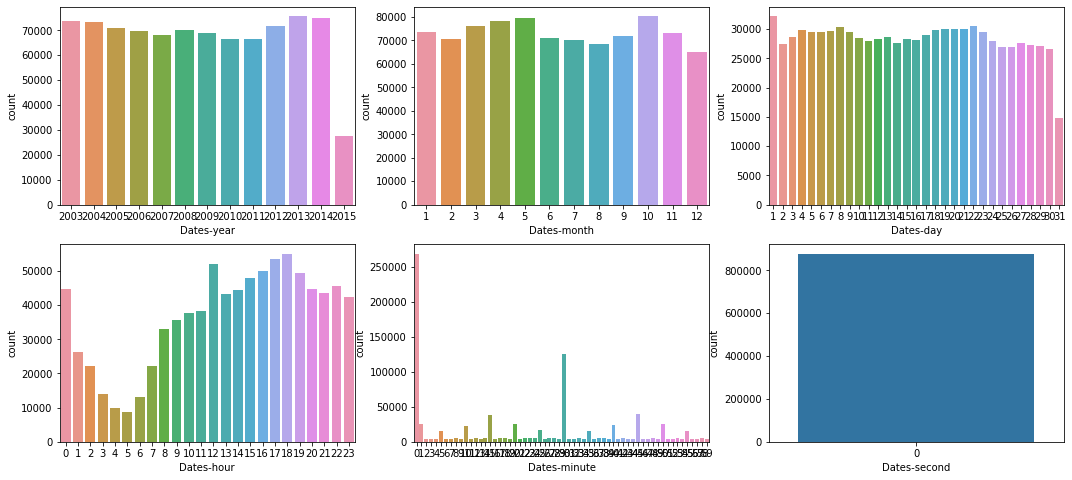

In [5]:
# matplotlib의 subplots를 사용합니다. 이 함수는 여러 개의 시각화를 한 화면에 띄울 수 있도록 합니다.
# 이번에는 2x3으로 총 6개의 시각화를 한 화면에 띄웁니다.
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)

# 시각화의 전체 사이즈는 18x8로 설정합니다.
figure.set_size_inches(18, 8)

# seaborn의 barplot으로 subplots의 각 구역에
# 연, 월, 일, 시, 분, 초 별 범죄의 발생 빈도를 출력합니다.
sns.countplot(data=train, x="Dates-year", ax=ax1)
sns.countplot(data=train, x="Dates-month", ax=ax2)
sns.countplot(data=train, x="Dates-day", ax=ax3)
sns.countplot(data=train, x="Dates-hour", ax=ax4)
sns.countplot(data=train, x="Dates-minute", ax=ax5)
sns.countplot(data=train, x="Dates-second", ax=ax6)

몇몇 부분은 우리의 예상과 일치하지만, 몇몇 부분은 차이가 있는 것 같습니다. 하나하나 살펴보겠습니다.

### Q1-2) 이 시각화로 발견할 수 있는 사실은 어떤 게 있을까요? 그리고 앞서 우리의 예상과 어떤 차이가 있나요?

**1. 분(```Dates-minute```), 초(```Dates-second```)는 범죄의 발생 빈도를 판가름하는데 별 영향이 없을 것 같다.**

초(```Dates-second```)는 우리의 예상과 일치하네요. 데이터가 전부 0으로 기록되어 있습니다. 그 뜻은, 초(```Dates-second```) feature로 넣어도 큰 의미가 없다고 해석할 수 있습니다.

하지만 분(```Dates-minute```)은 다릅니다. 범죄의 발생 빈도에 차이가 있고, 특이하게도 0분과 30분에 범죄가 빈번하게 발생합니다. 그 다음으로 순서대로 15분과 45분, 5분 10분 15분 20분 25분 등등으로 발생합니다. 이는 우리의 예상과 확연하게 다른 것 같습니다.

**2. 일(```Dates-day```) 31일을 제외하면 범죄의 발생 빈도를 판가름하는데 별 영향이 없을 것 같다.**

이는 시각화 결과와 일치합니다. 31일은 확실히 다른 날에 비해서 범죄가 절반 정도밖에 발생하지 않는 것 같습니다. 하지만 여기서도 특이한 사실을 알 수 있는데, 1일의 범죄 발생 빈도가 다른 날에 비해서 비약적으로 높습니다. 이는 우리의 예상과 다릅니다. 가령 어떤 범죄자, 내지는 어떤 범죄에 한정해서 1일에만 범죄가 빈번하게 발생한다? 라는 아이디어도 생각해 볼 수 있겠죠. (하지만 다소 납득하기 어려운 건 사실입니다)

**3. 시간(```Dates-hour```)은 범죄 발생 빈도에 큰 영향이 있을 것 같다.**

이는 시각화 결과와 일치합니다. 확실히 새벽에 범죄가 덜 발생하는 것 같고, 오후와 저녁에 범죄가 많이 발생하는 것 같습니다. 하지만 여기서도 신기한 사실은, 특이하게 0시와 12시에 범죄가 발생하는 빈도가 높은 것 같습니다. 이 점도 특이하다고 볼 수 있으며, 우리가 눈여겨봐야 하는 부분입니다.

자, 이제 더 중요한 사실에 대해서 고민해 보도록 하겠습니다. 우리에게 중요한건 데이터에 어떤 특징이 있는지 발견하는 것도 있지만, **이 특징을 활용해 앞으로 사용할 머신러닝 알고리즘을 개선시킬 수 있는가?**가 더 중요합니다. 또한 개선을 한다면 구체적으로 어떤 방식으로 개선하는지도 중요하겠죠.

### Q1-3) 이 사실을 통해 어떻게 예측 모델을 개선할 수 있을까요? 최소 3가지 아이디어를 내보세요.


1. 일단 초(```Dates-second```)는 전부 다 0으로 기록되어 있기 때문에, 범죄를 예측하는데 크게 중요하지 않을 것 같습니다. 그러므로 feature에서 제거하는 것도 좋은 아이디어 같습니다.
2. 다른 컬럼들, 특히나 시간(```Dates-hour```) 데이터는 예측 모델이 범죄를 예측하는데 큰 영향을 미칠 것 같습니다.
3. 분(```Dates-minute```)과 같은 기록이 잘 정리되지 않은 데이터는 잘 정리해서 머신러닝 모델에 집어넣으면 모델이 이 데이터를 이해하는데 도움이 될 것이다.

## X, Y

그 다음 분석하고 싶은 컬럼은 좌표 데이터입니다. [San Francisco Crime Classification](https://www.kaggle.com/c/sf-crime) 경진대회는 크게 두 가지 좌표 데이터가 있는데, 위도(Latitude)와 경도(Longitude)입니다. 데이터에서는 ```Y``` 컬럼이 위도를, ```X``` 컬럼이 경도를 나타냅니다. 이 정보는 범죄가 구체적으로 어떤 위치에서 발생했는지를 좌표로 찍어준거라고 볼 수 있습니다.

이런 좌표 정보를 시각화를 통해서 분석할 수 있는 가장 일반적인 방법은 seaborn의 [lmplot](https://seaborn.pydata.org/generated/seaborn.lmplot.html)입니다. 이 기능을 활용해서 좌표 정보를 시각화해보겠습니다.

먼저 시각화하기 전에, 이 시각화가 어떤 그림이 나올지 상상해보겠습니다.

### Q2-1) 시각화를 하기 전에 어떤 그림이 나올 것으로 예상하시나요? 최소 3가지 아이디어를 생각해보세요.

**주의**: 이 내용은 반드시 **시각화를 하기 전에 작성하셔야 합니다.** 그래야 시각화 결과와 본인의 아이디어를 비교해서 차이를 발견할 수 있습니다.

  1. 일단 샌프란시스코의 좌표 데이터이기 때문에, 샌프란시스코의 지도와 유사한 그림이 나올 것으로 생각합니다.
  2. 하지만 현실세계의 데이터이기 때문에, 샌프란시스코 지도 외각으로 데이터의 분포와 동떨어진 아웃라이어(outlier)가 존재할 것 같습니다.
  3. 그리고 범죄의 종류(ex: 절도, 살인 등)와 관계 없이 범죄 자체가 아에 발생할 가능성이 낮은 지역에는 그림에서 공백으로 보일 것 같습니다.

자, 그럼 위 예상과 일치하는지 데이터 시각화를 통해 살펴보도록 하겠습니다.

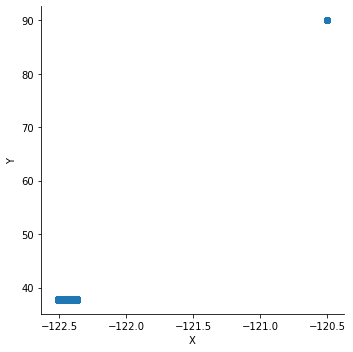

In [6]:
# seaborn의 lmplot을 사용해 좌표 데이터를 출력합니다.
# X축에는 경도(Longitude)를 나타내는 X를, Y축에는 위도(Latitude)를 나타내는 Y를 지정합니다.
# 그리고 추세선을 그리지 않기 위해(계산하는데 너무 느려서) fit_reg 옵션에 False를 주겠습니다.
sns.lmplot(data=train, x="X", y="Y", fit_reg=False)

결과를 보면 재미있는 현상을 발견할 수 있습니다.

기대했던 샌프란시스코 지도는 온데간데 없고, 좌표가 좌하단과 우상단에 몰려있는 현상을 발견할 수 있죠. 이는 우리가 기대한 결과와 다릅니다. 제 추측으로는, 시각화 결과의 좌하단에 위치한 점이나 우상단에 위치한 점, 둘 중 하나는 아웃라이어(outlier)인것 같습니다.

굳이 찍어보자면 둘 중 어느 부분이 아웃라이어일까요? 좌하단은 점이 약간 분산되어 있는 반면에, 우상단은 한 점으로 확실하게 몰려있는 것이 보입니다. 그러므로 저는 우상단이 아웃라이어라고 간주하고 이를 찾아보겠습니다.

In [7]:
# 경도(Longitude, X)와 위도(Latitude, Y)에서 가장 높은 값을 검색합니다.
# 이 점에 위치한 데이터가 아웃라이어(outlier)일 것으로 예상합니다.
train["X"].max(), train["Y"].max()

(-120.5, 90.0)

In [8]:
# 경도(X)가 아웃라이어(outlier)와 일치하면 True, 아니면 False인 결과를 가져옵니다.
# 이를 X_outliers라는 변수에 담습니다.
X_outliers = (train["X"] == train["X"].max())

# 위도(Y)가 아웃라이어(outlier)와 일치하면 True, 아니면 False인 결과를 가져옵니다.
# 이를 Y_outliers라는 변수에 담습니다.
Y_outliers = (train["Y"] == train["Y"].max())

# 경도(X)와 위도(Y)가 동시에 아웃라이어(outlier)인 데이터만 색인으로 가져옵니다.
# 이를 outlier라는 변수에 담습니다.
outlier = train[X_outliers & Y_outliers]

# outlier 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(outlier.shape)

# outlier 변수에 담긴 값을 출력합니다.
outlier

(67, 15)


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Dates-year,Dates-month,Dates-day,Dates-hour,Dates-minute,Dates-second
660485,2005-12-30 17:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Friday,TENDERLOIN,NONE,5THSTNORTH ST / OFARRELL ST,-120.5,90.0,2005,12,30,17,0,0
660711,2005-12-30 00:34:00,ASSAULT,INFLICT INJURY ON COHABITEE,Friday,BAYVIEW,"ARREST, BOOKED",JAMESLICKFREEWAY HY / SILVER AV,-120.5,90.0,2005,12,30,0,34,0
660712,2005-12-30 00:34:00,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Friday,BAYVIEW,"ARREST, BOOKED",JAMESLICKFREEWAY HY / SILVER AV,-120.5,90.0,2005,12,30,0,34,0
661106,2005-12-29 00:07:00,NON-CRIMINAL,"AIDED CASE, MENTAL DISTURBED",Thursday,TENDERLOIN,PSYCHOPATHIC CASE,5THSTNORTH ST / EDDY ST,-120.5,90.0,2005,12,29,0,7,0
666430,2005-11-30 11:25:00,OTHER OFFENSES,TRAFFIC VIOLATION,Wednesday,TENDERLOIN,"ARREST, CITED",5THSTNORTH ST / ELLIS ST,-120.5,90.0,2005,11,30,11,25,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844995,2003-06-11 08:49:00,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Wednesday,INGLESIDE,"ARREST, CITED",JAMES LICK FREEWAY HY / CESAR CHAVEZ ST,-120.5,90.0,2003,6,11,8,49,0
845842,2003-06-09 09:25:00,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Monday,INGLESIDE,"ARREST, CITED",JAMES LICK FREEWAY HY / CESAR CHAVEZ ST,-120.5,90.0,2003,6,9,9,25,0
852880,2003-05-02 01:00:00,SEX OFFENSES FORCIBLE,"FORCIBLE RAPE, BODILY FORCE",Friday,SOUTHERN,COMPLAINANT REFUSES TO PROSECUTE,3RD ST / JAMES LICK FREEWAY HY,-120.5,90.0,2003,5,2,1,0,0
857248,2003-04-14 16:30:00,ROBBERY,"ROBBERY ON THE STREET, STRONGARM",Monday,BAYVIEW,COMPLAINANT REFUSES TO PROSECUTE,GILMAN AV / FITCH ST,-120.5,90.0,2003,4,14,16,30,0


확인 결과 총 67개의 아웃라이어를 발견했습니다.

67개라는 건 전체 데이터(878049)의 0.01%도 되지 않기 때문에, 이 아웃라이어를 개선하거나 해결한다고 머신러닝 알고리즘의 성능을 크게 끌어올리는 건 어려울 것 같습니다. 그러므로 이 부분은 저도 후순위로 미루겠습니다. (나중에 시간이 될 때 여러분들이 스스로 분석해보세요)

이번에는 아웃라이어를 제거한 좌표 데이터로 시각화를 해보겠습니다.

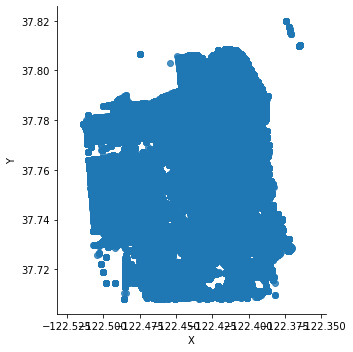

In [9]:
# 경도(X)와 위도(Y)가 동시에 아웃라이어(outlier)아 아닌(~) 데이터만 색인으로 가져옵니다.
# 이를 non_outliers라는 변수에 담습니다.
non_outliers = train[~(X_outliers & Y_outliers)]

# seaborn의 lmplot을 사용해 좌표 데이터를 출력합니다.
# X축에는 경도(Longitude)를 나타내는 X를, Y축에는 위도(Latitude)를 나타내는 Y를 지정합니다.
# 그리고 추세선을 그리지 않기 위해(계산하는데 너무 느려서) fit_reg 옵션에 False를 주겠습니다.
sns.lmplot(data=non_outliers, x="X", y="Y", fit_reg=False)

이제 원하는 그림(샌프란시스코 지도)이 나온 것을 확인할 수 있습니다.

### Q2-2) 이 시각화로 발견할 수 있는 사실은 어떤 게 있을까요? 그리고 앞서 우리의 예상과 어떤 차이가 있나요?

**1. 샌프란시스코의 지도와 유사한 그림이 나올 것 같다.**

일단 아웃라이어(-120.5, 90)가 전체 분포와 너무 멀리 떨어져 있기 때문에, 좌표 데이터가 좌하단이나 우상단으로 쏠리는 문제가 있었습니다. 하지만 이 아웃라이어를 제거한 후 출력한 시각화는 예상대로 샌프란시스코 지도와 유사한 그림이 나오는 것을 확인할 수 있습니다.

**2. 샌프란시스코 지도 외각으로 데이터의 분포와 동떨어진 아웃라이어(outlier)가 존재할 것 같다.**

우리의 예상과 일치합니다. 다만 그 아웃라이어가 샌프란시스코 지역과 우상단쪽으로 크게 동떨어진 것이 특이한 점 같습니다.

**3.그리고 범죄의 종류(ex: 절도, 살인 등)와 관계 없이 범죄 자체가 아에 발생할 가능성이 낮은 지역에는 그림에서 공백으로 보일 것 같습니다.**

시각화 결과를 살펴보면 확실히 지도 내부에 공백이 있는 부분이 보이는 것 같습니다. 이런 면에서 우리의 예상이 일치하는 것 같아 보이기도 합니다. 다만 이는 범죄가 발생하지 않는 지역인지, 애초부터 범죄가 발생할 수 없는 지역(산, 호수, 공원 등)인지를 명확히 알아봐야 합니다. 이는 여러분들에게 맡기겠습니다.

### Q2-3) 이 사실을 통해 어떻게 예측 모델을 개선할 수 있을까요? 최소 3가지 아이디어를 내보세요.

1. 일단 아웃라이어가 전체 데이터의 0.01%도 되지 않기 때문에, 이 아웃라이어를 해결한다고 모델의 성능이 크게 좋아지지는 않을 것입니다.
2. 아직 범죄 종류(ex: 절도, 살인 등)마다의 좌표 데이터의 변화를 보지 못했지만, 만일 범죄 종류마다 좌표 데이터가 차이가 있다면(=특정 지역에서 많이 발생하는 범죄 등이 있다면) 이 데이터를 머신러닝 모델에 집어 넣으면 성능을 좋게 만들 수 있을 것 같습니다.
3. 아웃라이어가 존재한다면, 이를 정상적인 값으로 고치거나, 아예 아웃라이어를 배제하면 머신러닝 알고리즘이 아웃라이어에로 인해서 성능이 낮아지는 현상이 사라질 것 같다.

## DayOfWeek

이번에 분석할 데이터는 요일(```DayOfWeek```) 컬럼입니다. 여기서부터는 제가 직접 하지 않고, 여러분들을 위한 과제로 제공하겠습니다. 앞서 ```Dates``` 컬럼과 ```X```, ```Y``` 컬럼을 EDA 했던 것 처럼, DayOfWeek도 직접 EDA 해보세요.

**힌트**

  * 시각화에서 큰 차이를 볼 수 없다면, Category(범죄 종류) 컬럼을 섞어서 시각화하면 좋은 힌트가 나올 수도 있습니다.

### Q3-1) DayOfWeek 컬럼을 시각화 하기 전에 어떤 그림이 나올 것으로 예상하시나요?

**주의**: 이 내용은 반드시 시각화를 하기 전에 작성하셔야 합니다. 그래야 시각화 결과와 본인의 아이디어를 비교해서 차이를 발견할 수 있습니다.

  1. 몇몇 특정 범죄에 한해서 주중일때와 주말일때 차이가 많이 날 것 같다. 가령 주말일 경우에 많이 발생하는 범죄가 있을 것 같다.
  2. 정 반대로, 주말일 경우에는 덜 발생하는 범죄도 존재할 것이다.
  3. 여기서 주말은 금토 or 토일이 될 것 같다.

### DayOfWeek 컬럼 시각화하기

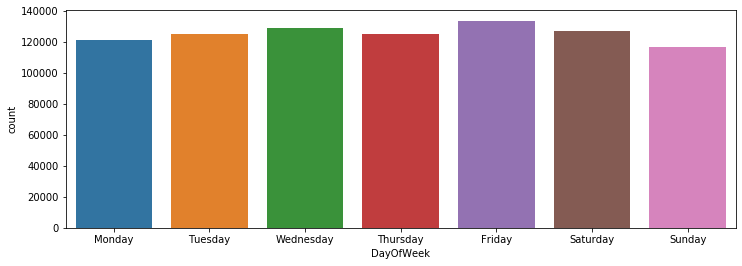

In [10]:
plt.figure(figsize = (12, 4))

dayofweek_list = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

sns.countplot(data = train, x = "DayOfWeek", order = dayofweek_list)

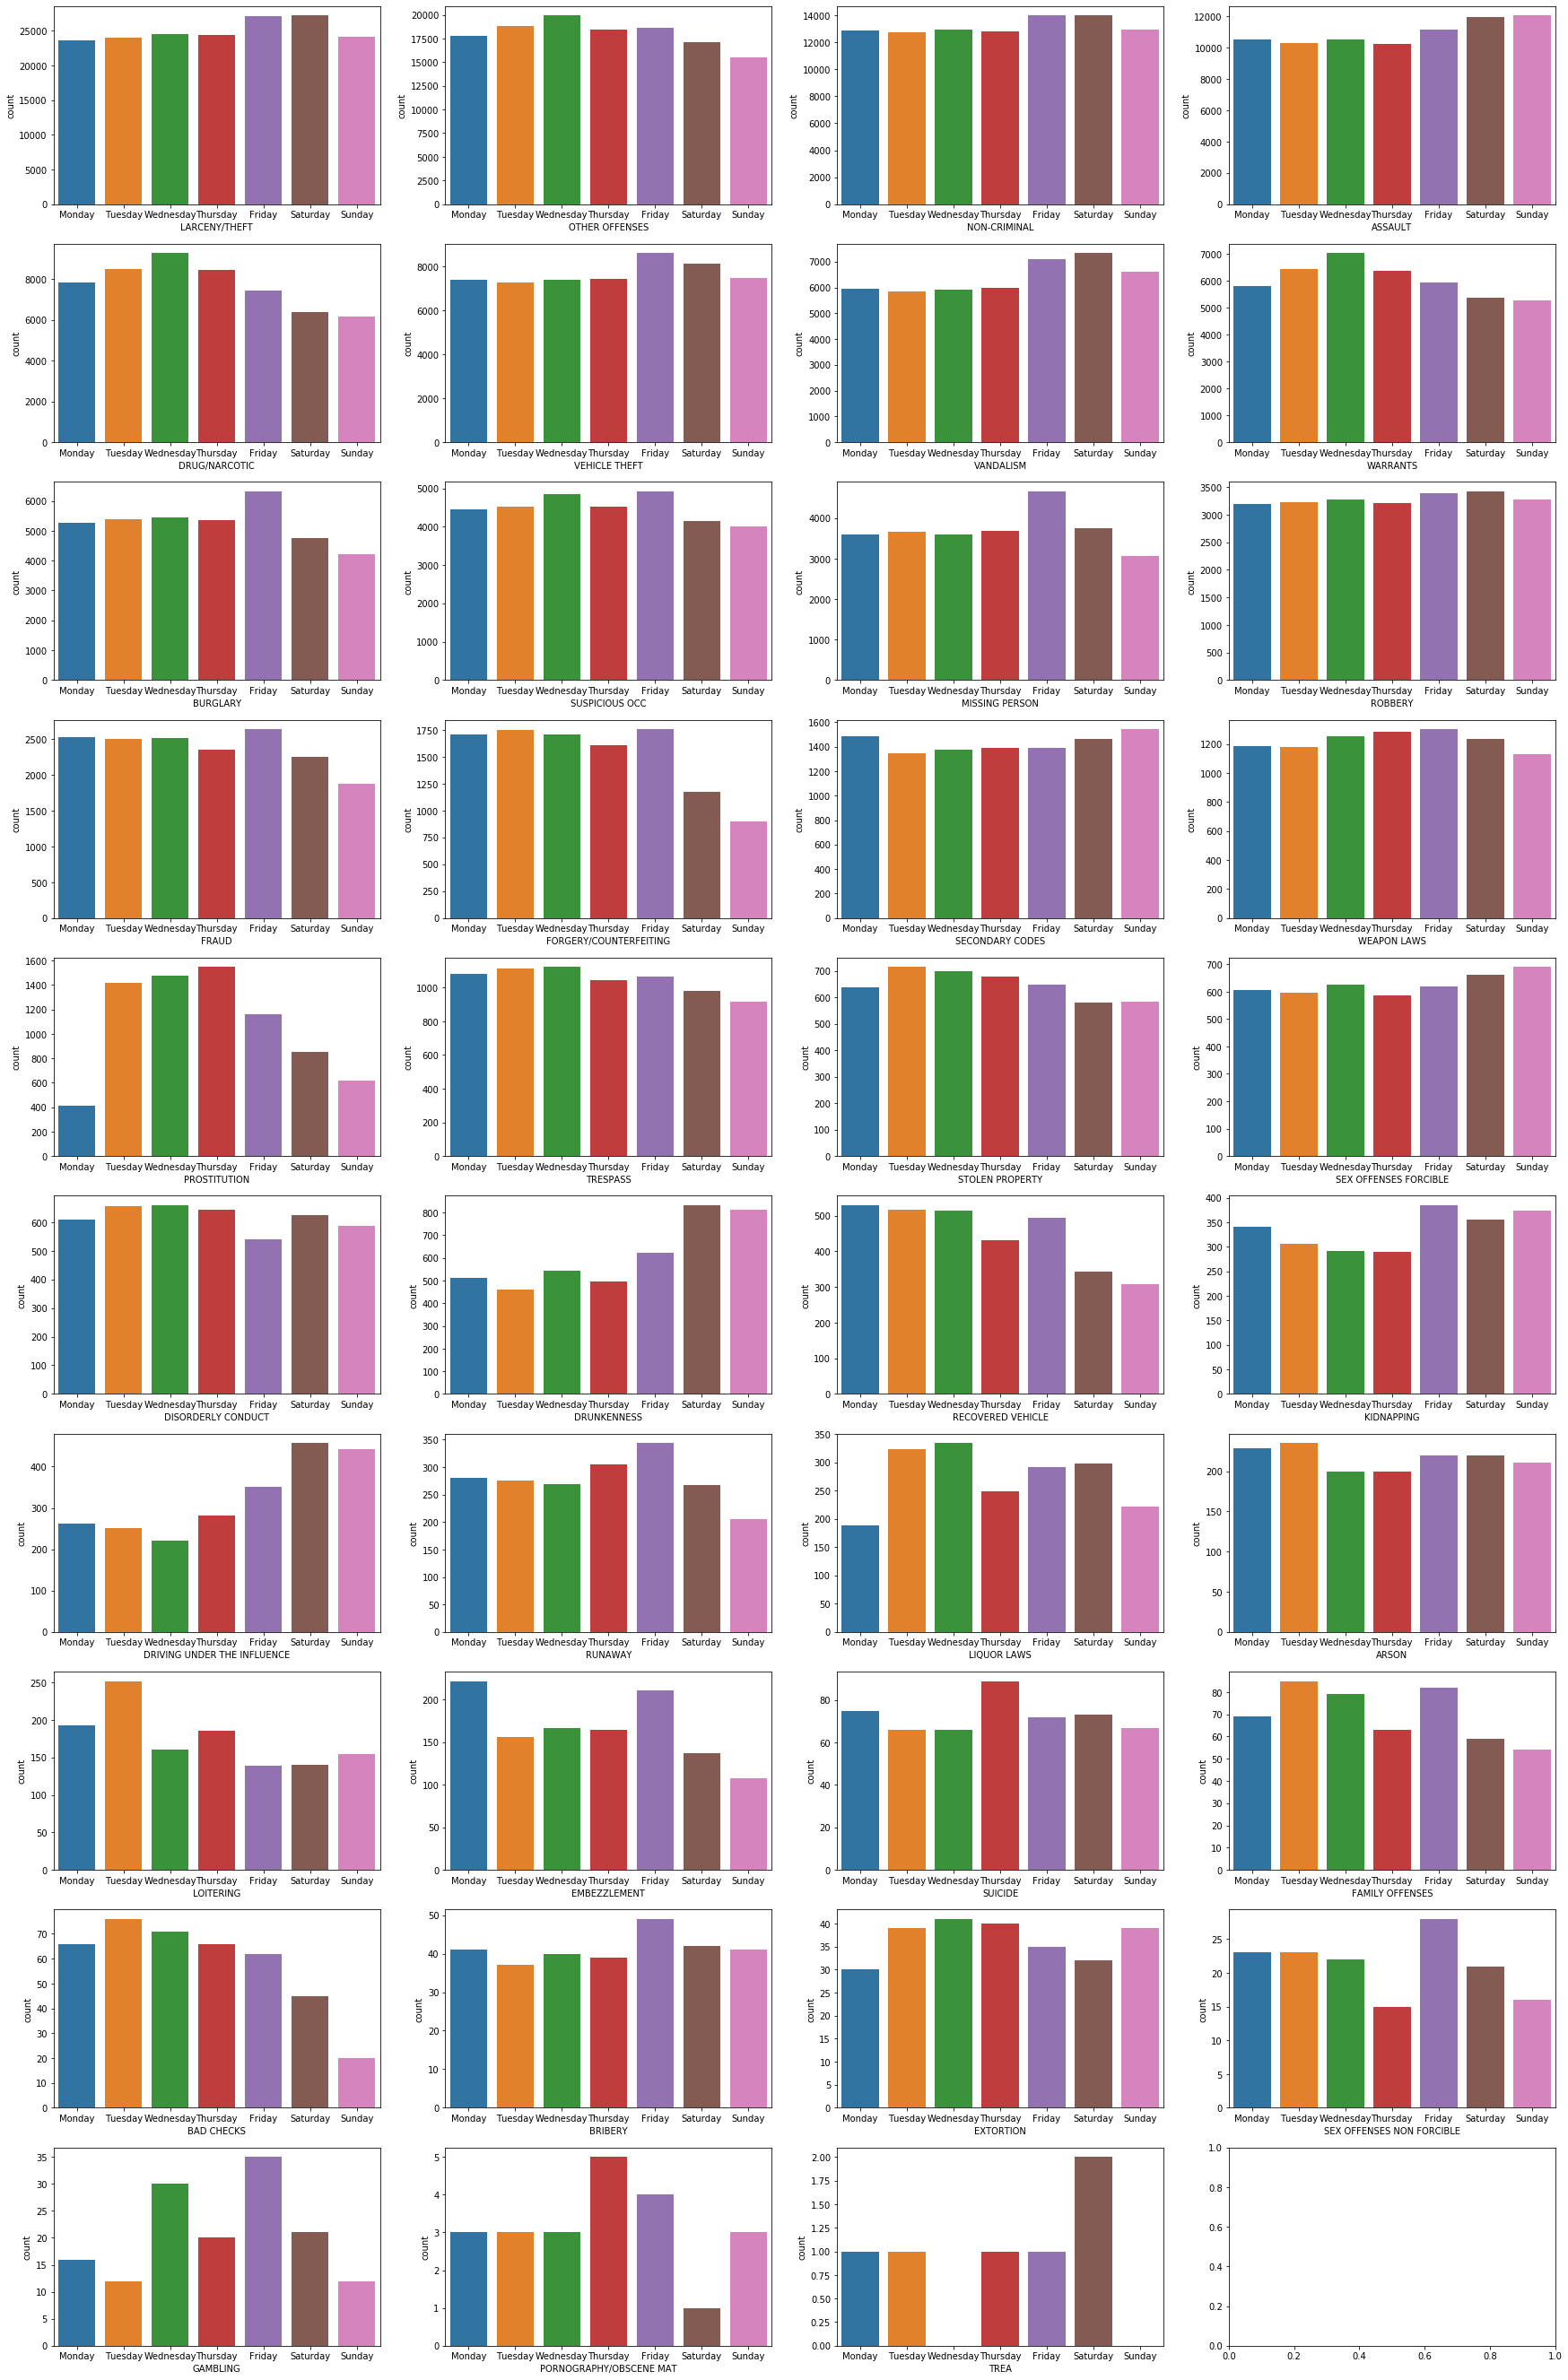

In [11]:
figure, axes = plt.subplots(nrows = 10, ncols = 4)
figure.set_size_inches(30, 48)

category_list = train["Category"].value_counts().index

for row in range(10):
    for column in range(4):
        index = row * 4 + column
        
        if index < len(category_list):
            ax = axes[row][column]
            category = category_list[index]
        
            target = train[train["Category"] == category]
            sns.countplot(data = target, x = "DayOfWeek", order = dayofweek_list, ax = ax)

            ax.set(xlabel = category)

### Q3-2) 이 시각화로 발견할 수 있는 사실은 어떤 게 있을까요? 그리고 앞서 우리의 예상과 어떤 차이가 있나요?

**1. 몇몇 특정 범죄에 한해서 주중일때와 주말일때 차이가 많이 날 것 같다. 가령 주말일 경우에 많이 발생하는 범죄가 있을 것 같다.**
  * 맞다. 특히나 과음(DRUNKENNESS), 음주운전(DRIVING UNDER THE INFLUENCE) 같은 경우가 주말에 많이 발생한다.

**2. 정 반대로, 주말일 경우에는 덜 발생하는 범죄도 존재할 것이다.**
  * 맞다. 가령 마약(DRUG/NARCOTIC), 절도(BURGLARY) 등이 그에 해당한다 위조(FORGERY/COUNTERFEITING)

**3. 여기서 주말은 금토 or 토일이 될 것 같다.**
  * 맞다. 가령 절도(LARCENY/THEFT)의 경우에는 금,토에 많이 발생한다.

### Q3-3) 이 사실을 통해 어떻게 예측 모델을 개선할 수 있을까요? 최소 3가지 아이디어를 내보세요.¶

1. 요일(```DayOfWeek```)이 범죄를 판가름하는데 중요한 영향을 끼친다는 것을 알 수 있다. 이 데이터를 넣으면 예측모델의 성능을 개선하는데 효과가 있을 것이다.
2. 하지만 범죄마자 중요한 요일의 타입이 다르다. 대부분 주중과 주말로 나뉘며, 주말을 금토로 할지 토일로 할지도 범죄마다 다르다.
3. 예외적으로 특정 요일에만 발생하는 범죄가 있으니 (MISSING PERSON, 금요일) 이는 주의할 것.

## PdDistrict
이번에 분석할 데이터는 관할 경찰서(PdDistrict) 컬럼입니다. 이 컬럼도 제가 직접 하지 않고 여러분들에게 과제로 제공하겠습니다. 앞서 Dates 컬럼과 X, Y 컬럼을 EDA 했던 것 처럼, PdDistrict도 직접 EDA 해보세요.

### Q4-1) PdDistrict 컬럼을 시각화 하기 전에 어떤 그림이 나올 것으로 예상하시나요?

**주의**: 이 내용은 반드시 시각화를 하기 전에 작성하셔야 합니다. 그래야 시각화 결과와 본인의 아이디어를 비교해서 차이를 발견할 수 있습니다.

1. 관할 경찰서가 곧 지역을 상징하므로, 범죄가 많이 발생하는 지역에 범죄 발생 빈도가 몰릴 것 같다.
2. 그리고 범죄의 타입에 따라, 특정 상황에 자주 발생하는 범죄가 있을 것이다.


### PdDistrict 컬럼 시각화하기

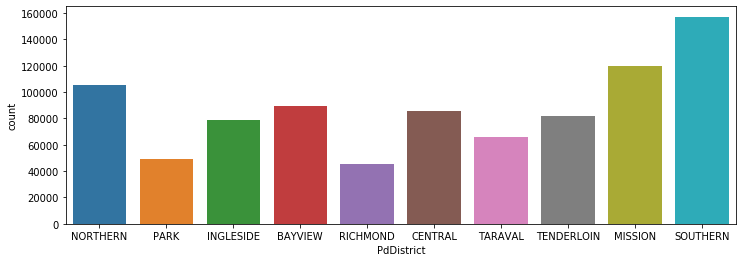

In [12]:
plt.figure(figsize = (12, 4))

sns.countplot(data = train, x = "PdDistrict")

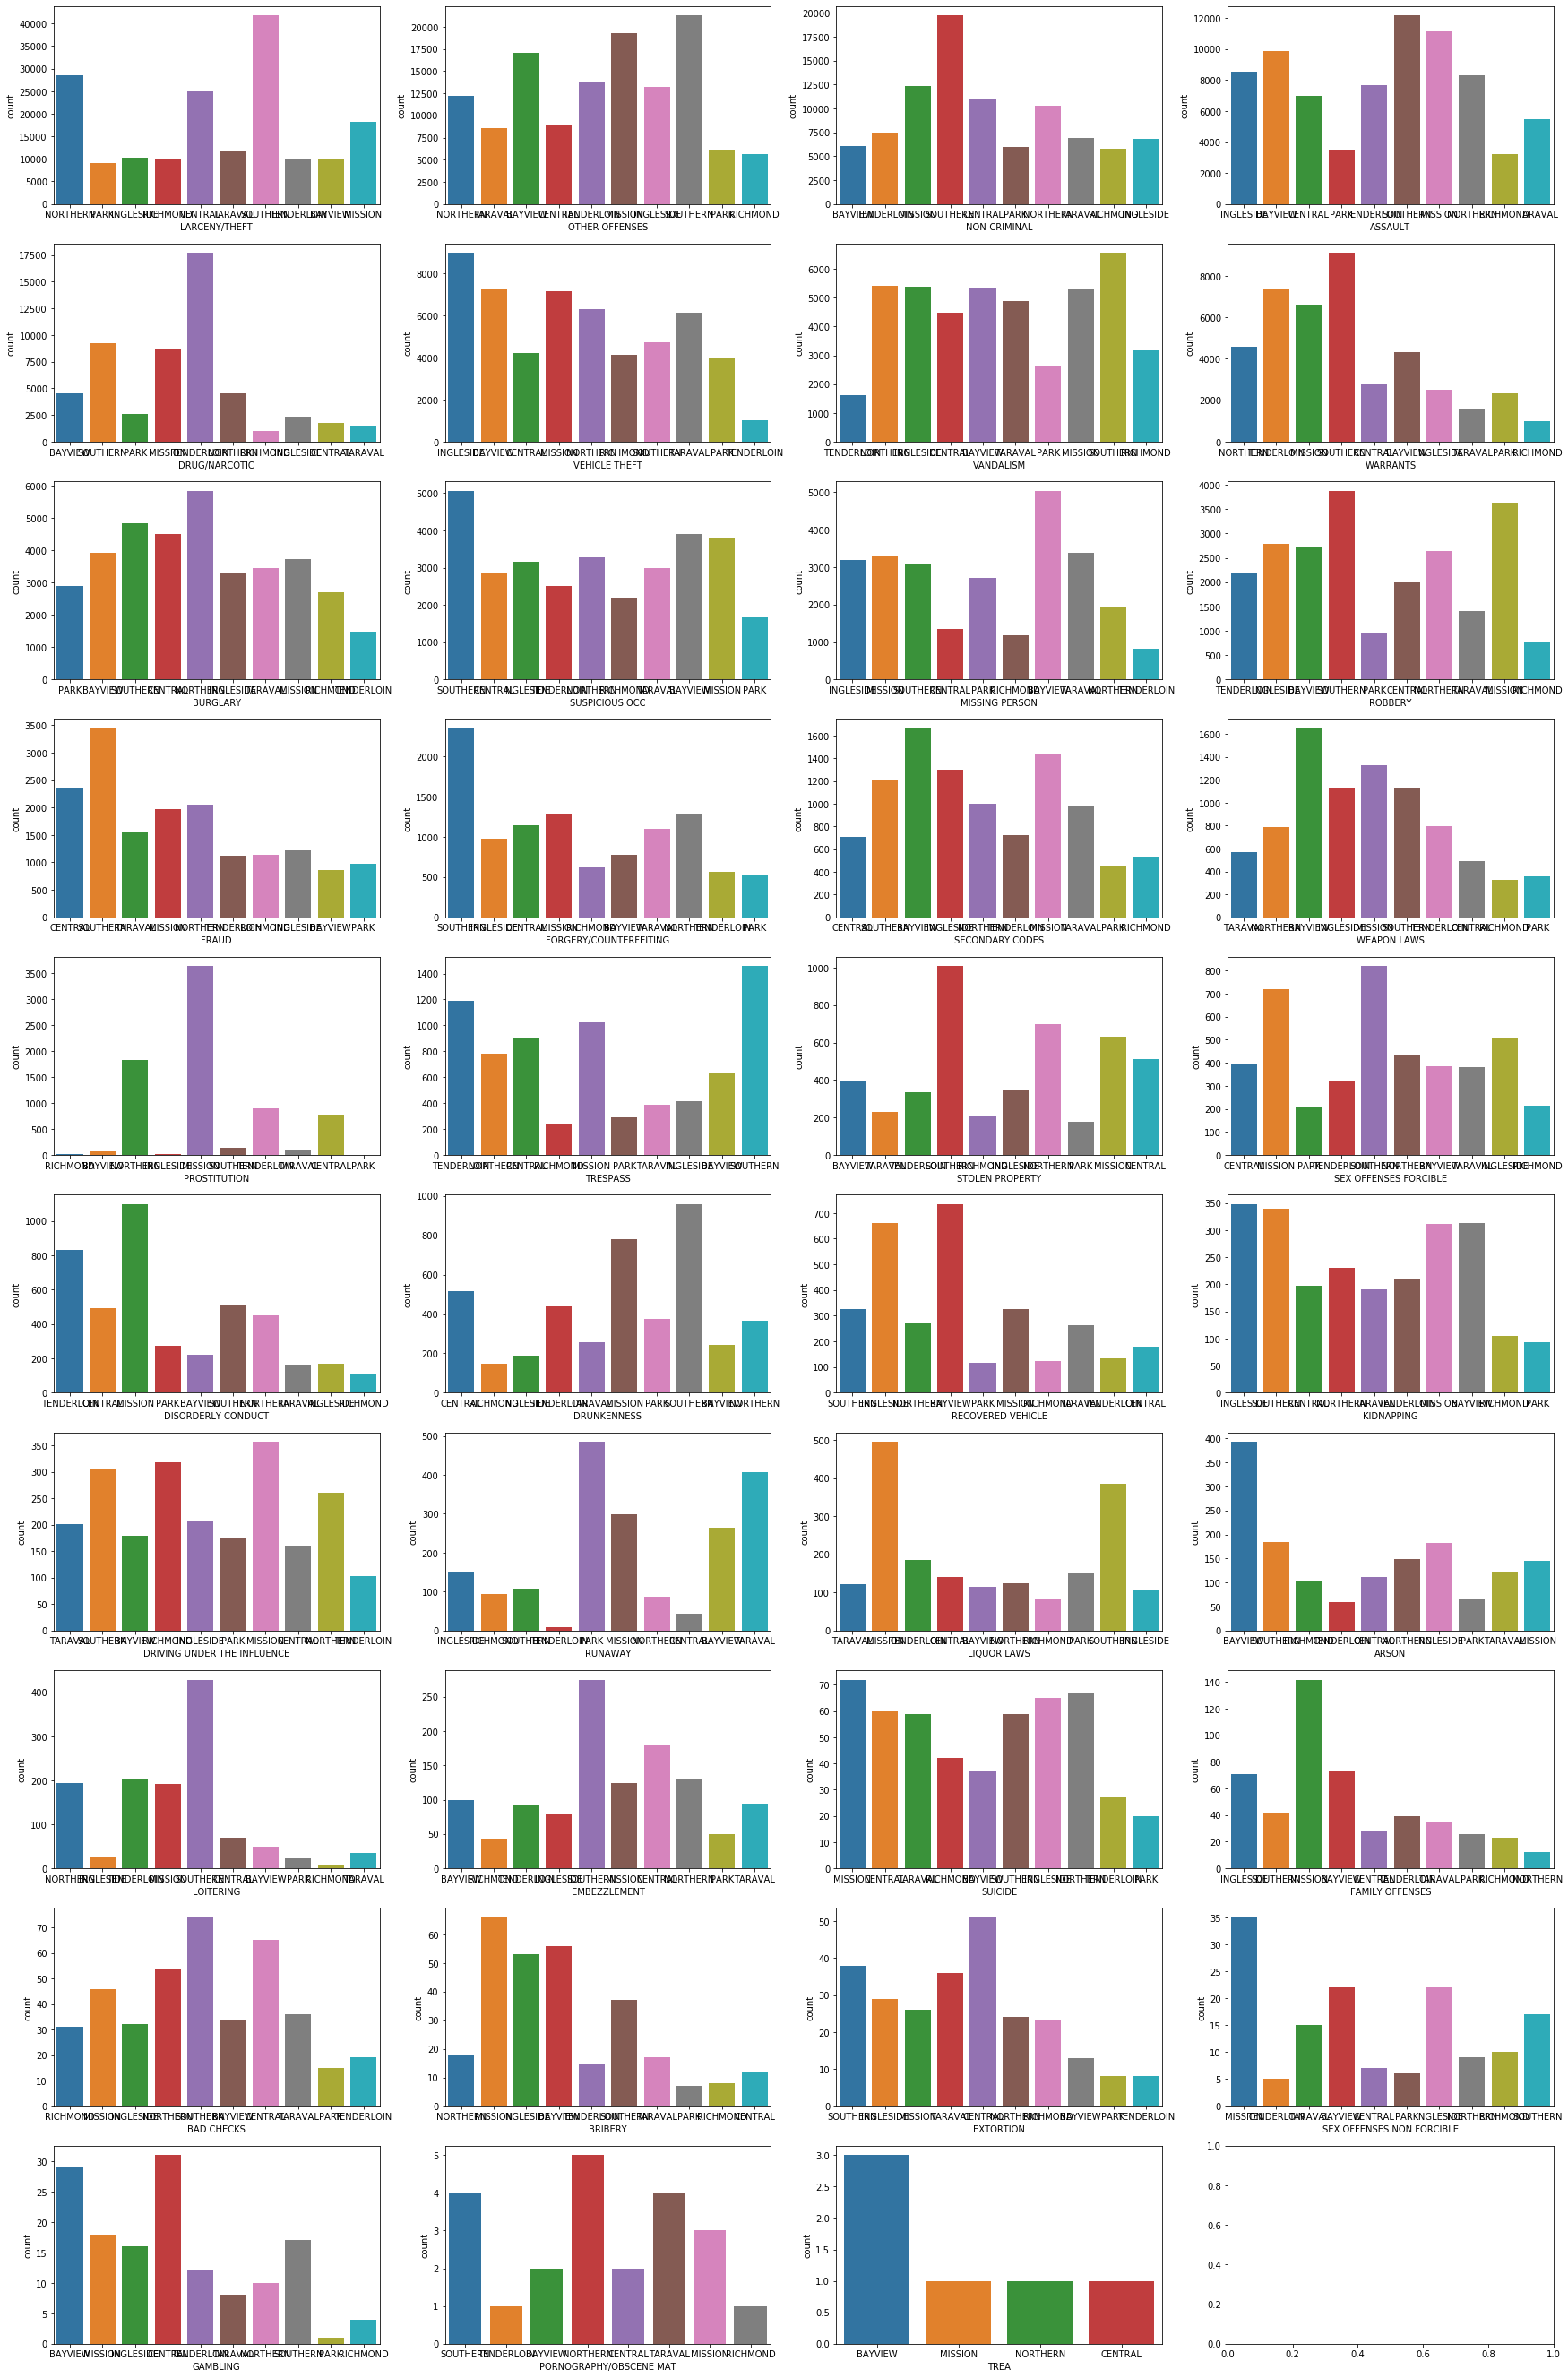

In [13]:
figure, axes = plt.subplots(nrows = 10, ncols = 4)
figure.set_size_inches(30, 48)

category_list = train["Category"].value_counts().index

for row in range(10):
    for column in range(4):
        index = row * 4 + column
        
        if index < len(category_list):
            ax = axes[row][column]
            category = category_list[index]
        
            target = train[train["Category"] == category]
            sns.countplot(data = target, x = "PdDistrict", ax = ax)

            ax.set(xlabel = category)

### Q3-2) 이 시각화로 발견할 수 있는 사실은 어떤 게 있을까요? 그리고 앞서 우리의 예상과 어떤 차이가 있나요?

1. 관할 경찰서가 곧 지역을 상징하므로, 범죄가 많이 발생하는 지역에 범죄 발생 빈도가 몰릴 것 같다.
  * 맞다. 가령 SOUTHERN의 경우에는 범죄가 타 지역에 비해서 굉장히 많이 발생하는 편이다.
  * 정 반대로 PARK와 RICHMOND는 범죄 발생 빈도가 낮은 편이다.
2. 그리고 범죄의 타입에 따라, 특정 상황에 자주 발생하는 범죄가 있을 것이다.
  * 맞다. 가령 TARAVAL의 경우 절도(LARCENY/THEFT)가 굉장히 많이 발생하고, 마약(DRUG/NARCOTIC)의 경우에는 RICHMOND에서 매우 자주 발생한다.


### Q4-3) 이 사실을 통해 어떻게 예측 모델을 개선할 수 있을까요? 최소 3가지 아이디어를 내보세요.¶

1. 관할 경찰서마다 범죄 발생 횟수가 이 정도로 명확한 데이터라면, 단순히 데이터를 [One Hot Encoding](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f) 해서 넣어줘도 큰 효과를 발휘할 것 같다.
1. 하나 더 추가하자면, 관할 경찰서라고 하더라도 결국에는 지역 데이터를 상징한다. 그러므로 다른 지역 데이터인 주소(Address), 좌표(X, Y)와 엮어줄 수 있는 방법이 있다면 모델의 성능을 개선하는데 더 큰 도움이 될 것.


## 나머지 데이터를 시각화를 통해 더 분석하기

지금까지 분석한 결과 외에도 다양한 방식으로 데이터를 분석하거나 시각화하여 데이터를 더 깊게 이해할려는 시도를 할 수 있습니다. 특히나 (힌트를 드리자면) ```Category``` 컬럼과 ```Address``` 컬럼을 잘 이해하는 것이 [San Francisco Crime Classification](https://www.kaggle.com/c/sf-crime) 경진대회에서 좋은 등수를 올릴 수 있는 핵심입니다.

그런 관점에서, 위에서 주워진 형식에 구애받지 않고 자유롭게 데이터를 분석하고 시각화해보세요.

## Address

주소(Address)컬럼은 범죄가 발생한 상세 주소에 대한 정보를 담고 있습니다. 이 주소에도 특정 범죄를 예측할 수 있는 중요한 내용을 담고 있습니다.

### Q5-1) Address 컬럼을 시각화 하기 전에 어떤 그림이 나올 것으로 예상하시나요?

**주의**: 이 내용은 반드시 시각화를 하기 전에 작성하셔야 합니다. 그래야 시각화 결과와 본인의 아이디어를 비교해서 차이를 발견할 수 있습니다.

  * 주소라는 것은 국가에서 나름대로의 합리적인 방식을 통해 체계화시킨 위치 표현 체계입니다. 그러므로 위도, 경도와 같은 정보와 다른 관점에서 범죄가 발생한 특정 위치를 알 수 있을 것 같습니다.
  * 가령, 미국 주소 체계에 따르면 ST, AV와 같은 특정 도로에 집중적으로 발생하는 범죄를 알 수 있고, 내지는 주소와 주소가 교차하는 교차점(Crossroad)에서 특정 범죄가 빈번하게 발생할 가능성이 높습니다.

In [14]:
train["Crossroad"] = train["Address"].str.contains("/")

print(train.shape)
train[["Address", "Crossroad"]].head()

(878049, 16)


,Address,Crossroad
0,OAK ST / LAGUNA ST,True
1,OAK ST / LAGUNA ST,True
2,VANNESS AV / GREENWICH ST,True
3,1500 Block of LOMBARD ST,False
4,100 Block of BRODERICK ST,False


### Address 컬럼 시각화하기

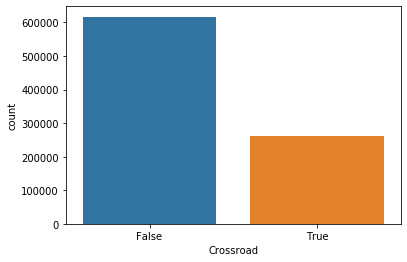

In [15]:
sns.countplot(data=train, x="Crossroad")

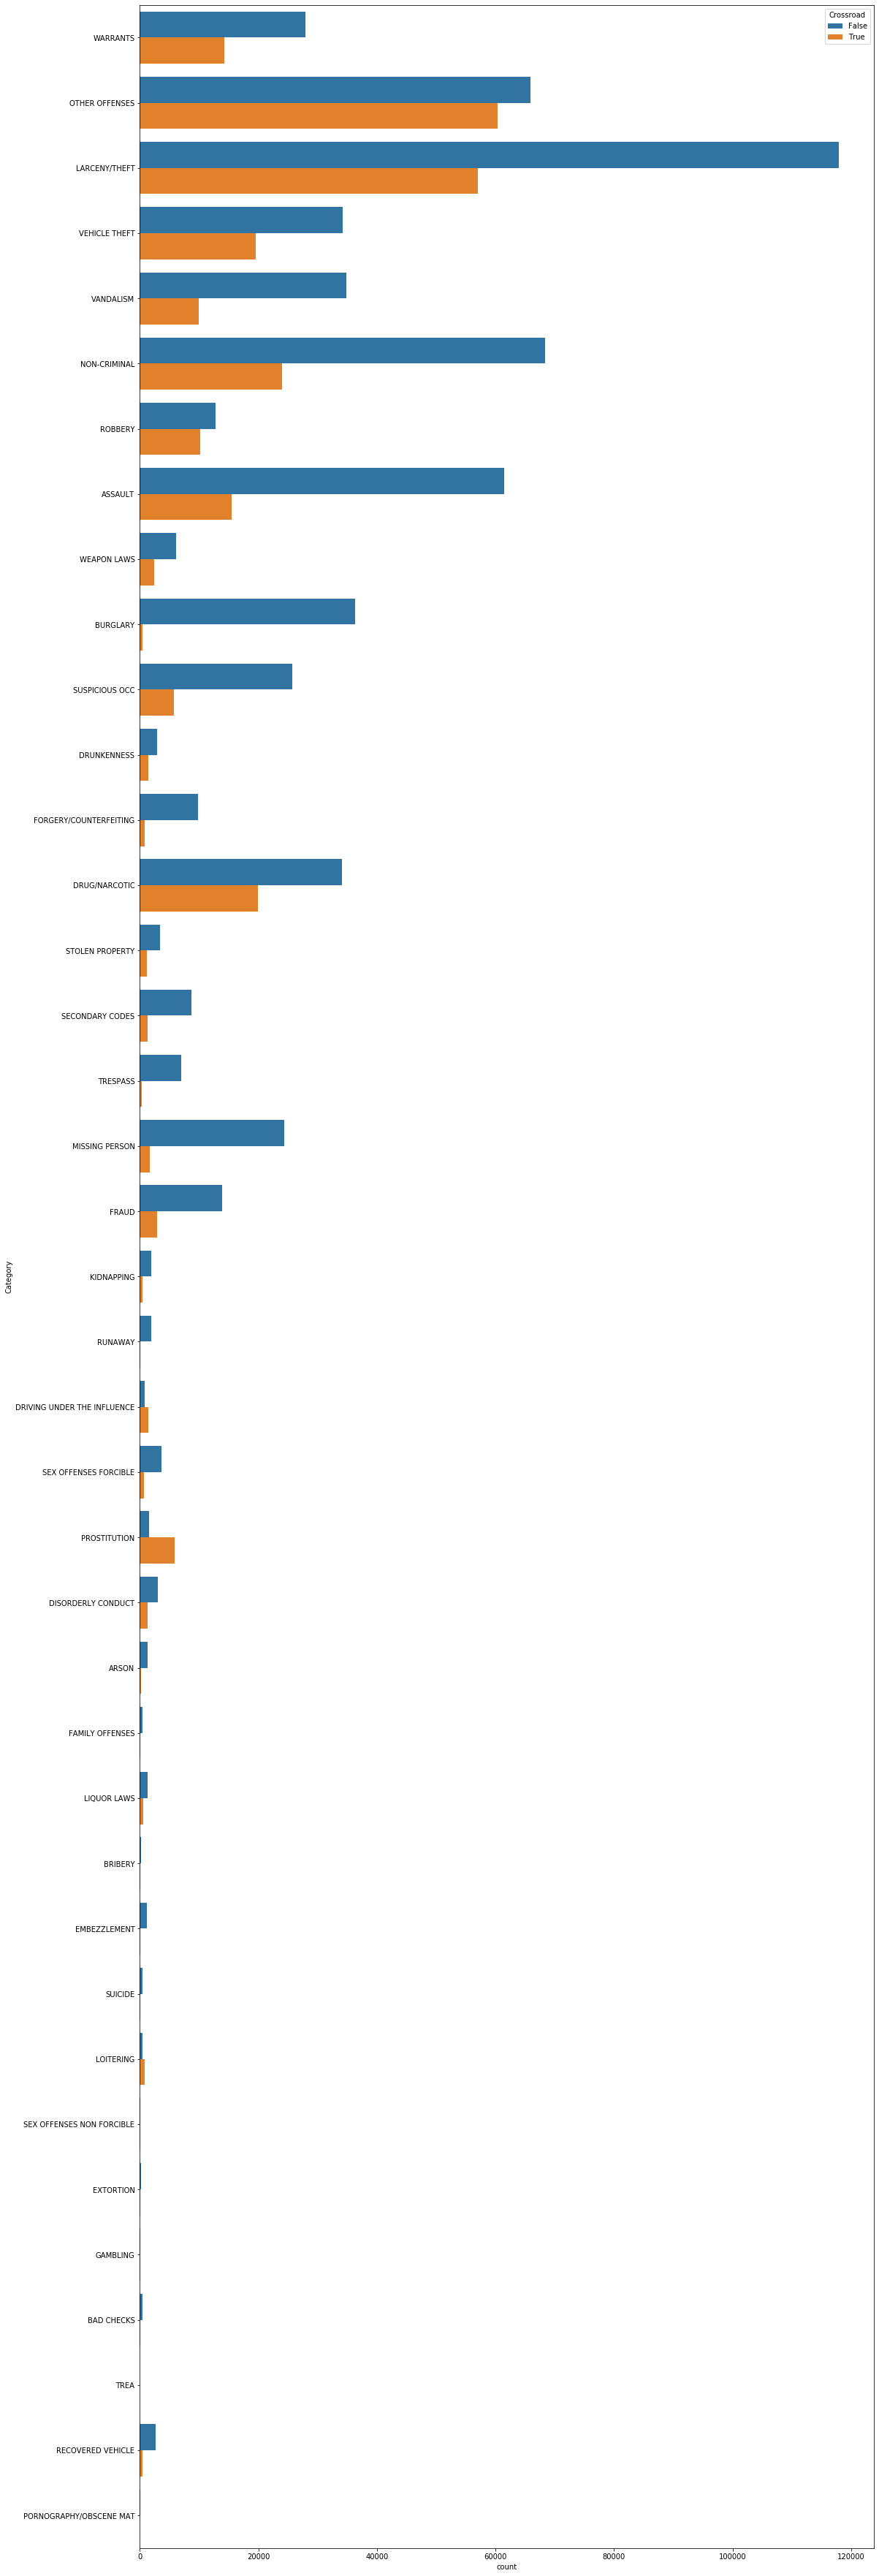

In [16]:
plt.figure(figsize = (18, 64))

sns.countplot(data=train, hue="Crossroad", y="Category")

### Q5-2) 이 시각화로 발견할 수 있는 사실은 어떤 게 있을까요? 그리고 앞서 우리의 예상과 어떤 차이가 있나요?


1. 가령, 미국 주소 체계에 따르면 ST, AV와 같은 특정 도로에 집중적으로 발생하는 범죄를 알 수 있고, 내지는 주소와 주소가 교차하는 교차점(Crossroad)에서 특정 범죄가 빈번하게 발생할 가능성이 높습니다.

- 맞는 것 같습니다. 아직 ST, AV와 같은 주소 표현 방식에 따른 범죄 발생 빈도의 차이는 시각화하지 않았지만 (=여러분들이 직접 시각화해서 분석하면 좋을 것 같습니다) 주로 슬래시(/)기호가 있는 교차점(Crossroad)와 그렇지 않은 부분(Block)이 특정 범죄에 따라 발생 빈도의 차이가 있다는 것을 발견할 수 있었습니다.

### Q5-3) 이 사실을 통해 어떻게 예측 모델을 개선할 수 있을까요?
* 제일 심플한 건, 해당 범죄가 발생한 지역이 교차점(Crossroad)인지, 그렇지 않은지를 머신러닝 모델에 새로운 Feature로 넣어주면 될 것 같습니다. 특히나 우리가 현재 머신러닝 모델에 주소 정보를 제대로 넣어주지 않았기 때문에, 이 정보만 넣어주더라도 큰 도움이 될 것 같습니다.
* 이 정보 이외에도, 특정 범죄가 발생하는 지역(ex: Launa ST, LOMBARD ST)만 따로 feature로 빼서 집어넣어 주는 것도 가능하고, ST나 AV라는 표현을 사용하는지 여부를 따로 feature로 빼서 집어넣어 주는 것도 가능할 것 같습니다.

## 나머지 데이터를 시각화를 통해 더 분석하기

지금까지 분석한 결과 외에도 다양한 방식으로 데이터를 분석하거나 시각화하여 데이터를 더 깊게 이해할려는 시도를 할 수 있습니다. 특히나 (힌트를 드리자면) ```Category``` 컬럼과 ```Address``` 컬럼을 잘 이해하는 것이 [San Francisco Crime Classification](https://www.kaggle.com/c/sf-crime) 경진대회에서 좋은 등수를 올릴 수 있는 핵심입니다.

그런 관점에서, 위에서 주워진 형식에 구애받지 않고 자유롭게 데이터를 분석하고 시각화해보세요. 분석하거나 시각화 할 때 다음의 링크를 참고하는 걸 추천드립니다.

* Mapping and Visualizing Violent Crime. ([링크](https://www.kaggle.com/mircat/violent-crime-mapping), [자료](https://www.kaggleusercontent.com/kf/144822/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..f18gU6H9MwiocQzte1wYUA.4n2GyIh6jZhkBR7iCLgiOBoRkuc4rvKZCyHpLWqaN-VYAckpd9DhvGmebkOLz4nJARW5m1ZY0aAp-1B9KKjiT66Y8CjpkWIhBavo0YQxx6Wfa_Uz-BmGzB9FsiTGT2ypT5hE_ns0SQQYPLh6ulXlfw.EGXnmo9w1gATD0AkT5X1WQ/output.html))
* Crime density by location. ([링크](https://www.kaggle.com/dbennett/test-map))
* White-Collar vs. Blue-Collar Crime in SF. ([링크](https://www.kaggle.com/ampaho/white-collar-vs-blue-collar-crime-in-sf))
* Histograms of Crime by Day/District/Year. ([링크](https://www.kaggle.com/petercooman/histograms-of-crime-category-by-day))
* Top Crimes Zones. [링크](https://www.kaggle.com/sanghan/top-crimes-zones)
* Vehicle Thefts or Jerry Rice Jubilation?. [링크](https://www.kaggle.com/eyecjay/vehicle-thefts-or-jerry-rice-jubilation/output), [자료](https://www.kaggleusercontent.com/kf/18658/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..pbs95iVw0JCyvqI1Bx7Dow.y_q4Ttp_RJ6y1IqZjgiS19Tim_UhjIbpHfXNRA5MMQr6-INsupTZXJWuLwX-SXDPYacCHD6UM7eA-DfaddOdSgLwPkQWtpEW8yWnfSmnWyIpWld7XHqa5rPsQ7GhjzITDjMrzIwFAvui3NsyPZbrUgAyhcDHKnC1Ye5l8uefGbg.a9MmwpxVypr0vRB9wSjZYA/output.html)
* San Francisco Crime Classification. [링크](https://cseweb.ucsd.edu/classes/wi17/cse258-a/reports/a031.pdf)
* San Francisco crime classification: Descriptive, Predictive, and Prescriptive analysis.  [링크](https://medium.com/@m.vkumar89/san-francisco-spatial-data-research-for-crime-classification-1a6f1c1b7d09)
* My entry to the Kaggle SF crime classification competition using Apache Spark. [링크](http://benfradet.github.io/blog/2016/06/08/SF-crime-classification-with-Apache-Spark)

In [17]:
# Write your code here!

### Reload Dataset

탐험적 데이터 분석(EDA)을 끝냈으면, 이제 분석이 끝난 데이터를 머신러닝 알고리즘을 활용하여 예측하는 일만 남았습니다.

예측을 하기 전에, 이전에 읽어온 ```train.csv``` 뿐만 아니라 ```test.csv``` 도 함께 읽어와야 할 것 같습니다. 이를 위해 다시 한 번 판다스의 ```read_csv```를 활용해 데이터를 읽어오겠습니다. 마찬가지로 파일의 경로를 지정하는 법이 생각나지 않는다면 [다음의 링크](http://88240.tistory.com/122)를 통해 경로를 지정하는 법을 복습한 뒤 다시 시도해주세요.

In [18]:
# 판다스의 read_csv를 활용해 train.csv 파일을 읽어옵니다.
# 읽어온 데이터를 train이라는 이름의 변수에 할당합니다.
train = pd.read_csv("train.csv")

# train 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(train.shape)

# head()로 train 데이터의 상위 5개를 띄웁니다.
train.head()

(878049, 9)


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [19]:
# 비슷한 방법으로 test.csv 파일을 읽어옵니다.
# 여기서 train.csv와는 다르게, Id 컬럼을 데이터의 인덱스(Index, row를 가져오는 기준)로 지정합니다.
# 읽어온 데이터를 test이라는 이름의 변수에 할당합니다.
test = pd.read_csv("test.csv", index_col = "Id")

# test 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(test.shape)

# head()로 test 데이터의 상위 5개를 띄웁니다.
test.head()

(884262, 6)


,Dates,DayOfWeek,PdDistrict,Address,X,Y
Id,,,,,,
0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412


## Preprocessing

데이터를 읽어왔으면, 이제 본격적으로 머신러닝(Machine Learning) 알고리즘을 활용해 범죄를 예측하는 작업을 진행하겠습니다.

데이터를 머신러닝 알고리즘에 넣기 위해서는 데이터를 머신러닝 알고리즘이 이해할 수 있는 형태로 변환해줘야 합니다. 이 과정을 전문용어로 전처리(Preprocessing)라고 합니다.

[scikit-learn](https://scikit-learn.org/) 에서 제공하는 머신러닝 알고리즘에 데이터를 넣을 수 있는 기본 조건은 다음과 같습니다.

  * 모든 데이터는 숫자(정수형, 실수형 등)로 구성되어 있어야 한다.
  * 데이터에 빈 값이 없어야 한다.

여기서는 날짜와 시간을 나타내는 ```Dates``` 컬럼, 그리고 요일(```DayOfWeek```)과 관할 경찰서(```PdDistrict```) 컬럼을 전처리하는 법을 살펴보겠습니다.

### Dates

먼저 날짜와 시간을 나타내는 ```Dates``` 컬럼부터 살펴보겠습니다.

```Dates``` 컬럼은 얼핏 보면 여러개의 숫자로 구성되어 있습니다. (ex: 2015-01-01 00:00:00) 하지만 자세히 살펴보면 숫자라고 볼 수 없는 하이픈(-)이나 콜론(:)같은 기호가 있기 때문에 결론적으로 숫자는 아니며, 판다스에서는 문자열(object) 또는 날짜(datetime64)로 인식하게 됩니다. 그 뜻은, 이 컬럼을 그대로 [scikit-learn](https://scikit-learn.org/) 에서 제공하는 머신러닝 모델에 집어넣으면 머신러닝 모델에서 받아들일 수 없다는 이야기입니다.

이러한 컬럼을 사용하기 위해서는 머신러닝 알고리즘이 이해할 수 있는 방식으로 전처리를 해줘야 합니다.

```Dates``` 컬럼을 전처리하는 가장 쉬운 방법은 연, 월, 일, 시, 분, 초를 따로 나누는 것입니다. 가령 2015-01-01 00:00:00은 2015년 1월 1일 0시 0분 0초라고 볼 수 있으므로, 2015, 1, 1, 0, 0, 0으로 따로 나누면 총 6개의 숫자가 됩니다. 즉, ```Dates``` 컬럼을 여섯개의 다른 컬럼으로 나누어주는 것이 날짜 컬럼을 전처리하는 핵심입니다.

In [20]:
# Dates 컬럼은 현재 문자열(string, 판다스에서는 object라고 표현합니다) 데이터타입으로 되어있는데,
# 이를 DateTime 데이터타입으로으로 변환하겠습니다. 판다스의 to_datetime으로 사용하면 됩니다.
train["Dates"] = pd.to_datetime(train["Dates"])

# train 데이터에 연, 월, 일, 시, 분, 초를 나타내는 새로운 컬럼을 생성합니다.
# 각각의 이름을 Dates-year/month/day/hour/minute/second라고 가정합니다.
# 이 컬럼에 날짜(datetime) 컬럼의 dt(datetime의 약자입니다) 옵션을 활용하여 연월일시분초를 따로 넣어줍니다.
train["Dates-year"] = train["Dates"].dt.year
train["Dates-month"] = train["Dates"].dt.month
train["Dates-day"] = train["Dates"].dt.day
train["Dates-hour"] = train["Dates"].dt.hour
train["Dates-minute"] = train["Dates"].dt.minute
train["Dates-second"] = train["Dates"].dt.second

# train 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(train.shape)

# .head()로 train 데이터의 상위 5개를 띄우되,
# Dates과 이와 연관된 나머지 일곱 개의 컬럼만을 출력합니다.
train[["Dates", "Dates-year", "Dates-month", "Dates-day", "Dates-hour", "Dates-minute", "Dates-second"]].head()

(878049, 15)


,Dates,Dates-year,Dates-month,Dates-day,Dates-hour,Dates-minute,Dates-second
0,2015-05-13 23:53:00,2015,5,13,23,53,0
1,2015-05-13 23:53:00,2015,5,13,23,53,0
2,2015-05-13 23:33:00,2015,5,13,23,33,0
3,2015-05-13 23:30:00,2015,5,13,23,30,0
4,2015-05-13 23:30:00,2015,5,13,23,30,0


In [21]:
# train 데이터와 마찬가지로, test도 to_datetime를 활용해 DateTime으로 변환합니다.
test["Dates"] = pd.to_datetime(test["Dates"])

# test 데이터에 연, 월, 일, 시, 분, 초를 나타내는 새로운 컬럼을 생성합니다.
# 각각의 이름을 Dates-year/month/day/hour/minute/second라고 가정합니다.
# 이 컬럼에 날짜(datetime) 컬럼의 dt(datetime의 약자입니다) 옵션을 활용하여 연월일시분초를 따로 넣어줍니다.
test["Dates-year"] = test["Dates"].dt.year
test["Dates-month"] = test["Dates"].dt.month
test["Dates-day"] = test["Dates"].dt.day
test["Dates-hour"] = test["Dates"].dt.hour
test["Dates-minute"] = test["Dates"].dt.minute
test["Dates-second"] = test["Dates"].dt.second

# test 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(test.shape)

# .head()로 test 데이터의 상위 5개를 띄우되,
# Dates과 이와 연관된 나머지 일곱 개의 컬럼만을 출력합니다.
test[["Dates", "Dates-year", "Dates-month", "Dates-day", "Dates-hour", "Dates-minute", "Dates-second"]].head()

(884262, 12)


,Dates,Dates-year,Dates-month,Dates-day,Dates-hour,Dates-minute,Dates-second
Id,,,,,,,
0,2015-05-10 23:59:00,2015,5,10,23,59,0
1,2015-05-10 23:51:00,2015,5,10,23,51,0
2,2015-05-10 23:50:00,2015,5,10,23,50,0
3,2015-05-10 23:45:00,2015,5,10,23,45,0
4,2015-05-10 23:45:00,2015,5,10,23,45,0


### Encode DayOfWeek

그 다음은 요일(```DayOfWeek```) 컬럼을 전처리하겠습니다.

요일(```DayOfWeek```)컬럼도 마찬가지로 숫자가 아니기 때문에, [scikit-learn](https://scikit-learn.org/) 에서 제공하는 머신러닝 모델에 집어넣으면 이 컬럼을 인식할 수 없습니다.

이런 경우에는 어떻게 해야 할까요? 이런 상황에서 가장 일반적으로 쓸 수 있는 방법은 요일(```DayOfWeek```) 컬럼을 인코딩(Encoding)입니다. 인코딩은 머신러닝 알고리즘이 이 데이터를 이해할 수 있도록 숫자 데이터로 바꿔주는 기능입니다. 인코딩의 종류는 여러가지이고, 데이터에 따라 사용하는 인코딩 방식도 다양하지만, 머신러닝 모델에 사용하는 가장 일반적인 인코딩 방식은  [One Hot Encoding](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f) 입니다.

가령 ```train``` 데이터의 요일(```DayOfWeek```) 컬럼을 One Hot Encoding한 결과는 다음과 같습니다.

<table border="1" class="dataframe">
      <thead>
        <tr class="c1">
          <th></th>
          <th>
            DayOfWeek
          </th>
          <th>
            DayOfWeek_Monday
          </th>
          <th>
            DayOfWeek_Tuesday
          </th>
          <th>
            DayOfWeek_Wednesday
          </th>
          <th>
            DayOfWeek_Thursday
          </th>
          <th>
            DayOfWeek_Friday
          </th>
          <th>
            DayOfWeek_Saturday
          </th>
          <th>
            DayOfWeek_Sunday
          </th>
        </tr>
      </thead>
      <tbody>
        <tr>
          <th>
            0
          </th>
          <td>
            Wednesday
          </td>
          <td>
            False
          </td>
          <td>
            False
          </td>
          <td>
            True
          </td>
          <td>
            False
          </td>
          <td>
            False
          </td>
          <td>
            False
          </td>
          <td>
            False
          </td>
        </tr>
        <tr>
          <th>
            1
          </th>
          <td>
            Wednesday
          </td>
          <td>
            False
          </td>
          <td>
            False
          </td>
          <td>
            True
          </td>
          <td>
            False
          </td>
          <td>
            False
          </td>
          <td>
            False
          </td>
          <td>
            False
          </td>
        </tr>
        <tr>
          <th>
            2
          </th>
          <td>
            Wednesday
          </td>
          <td>
            False
          </td>
          <td>
            False
          </td>
          <td>
            True
          </td>
          <td>
            False
          </td>
          <td>
            False
          </td>
          <td>
            False
          </td>
          <td>
            False
          </td>
        </tr>
        <tr>
          <th>
            3
          </th>
          <td>
            Wednesday
          </td>
          <td>
            False
          </td>
          <td>
            False
          </td>
          <td>
            True
          </td>
          <td>
            False
          </td>
          <td>
            False
          </td>
          <td>
            False
          </td>
          <td>
            False
          </td>
        </tr>
        <tr>
          <th>
            4
          </th>
          <td>
            Wednesday
          </td>
          <td>
            False
          </td>
          <td>
            False
          </td>
          <td>
            True
          </td>
          <td>
            False
          </td>
          <td>
            False
          </td>
          <td>
            False
          </td>
          <td>
            False
          </td>
        </tr>
      </tbody>
    </table>

비슷하게, ```test``` 데이터의 요일(```DayOfWeek```) 컬럼을 One Hot Encoding한 결과는 다음과 같습니다.

<table border="1" class="dataframe">
      <thead>
        <tr class="c1">
          <th></th>
          <th>
            DayOfWeek
          </th>
          <th>
            DayOfWeek_Monday
          </th>
          <th>
            DayOfWeek_Tuesday
          </th>
          <th>
            DayOfWeek_Wednesday
          </th>
          <th>
            DayOfWeek_Thursday
          </th>
          <th>
            DayOfWeek_Friday
          </th>
          <th>
            DayOfWeek_Saturday
          </th>
          <th>
            DayOfWeek_Sunday
          </th>
        </tr>
        <tr>
          <th>
            Id
          </th>
          <th></th>
          <th></th>
          <th></th>
          <th></th>
          <th></th>
          <th></th>
          <th></th>
          <th></th>
        </tr>
      </thead>
      <tbody>
        <tr>
          <th>
            0
          </th>
          <td>
            Sunday
          </td>
          <td>
            False
          </td>
          <td>
            False
          </td>
          <td>
            True
          </td>
          <td>
            False
          </td>
          <td>
            False
          </td>
          <td>
            False
          </td>
          <td>
            False
          </td>
        </tr>
        <tr>
          <th>
            1
          </th>
          <td>
            Sunday
          </td>
          <td>
            False
          </td>
          <td>
            False
          </td>
          <td>
            True
          </td>
          <td>
            False
          </td>
          <td>
            False
          </td>
          <td>
            False
          </td>
          <td>
            False
          </td>
        </tr>
        <tr>
          <th>
            2
          </th>
          <td>
            Sunday
          </td>
          <td>
            False
          </td>
          <td>
            False
          </td>
          <td>
            True
          </td>
          <td>
            False
          </td>
          <td>
            False
          </td>
          <td>
            False
          </td>
          <td>
            False
          </td>
        </tr>
        <tr>
          <th>
            3
          </th>
          <td>
            Sunday
          </td>
          <td>
            False
          </td>
          <td>
            False
          </td>
          <td>
            True
          </td>
          <td>
            False
          </td>
          <td>
            False
          </td>
          <td>
            False
          </td>
          <td>
            False
          </td>
        </tr>
        <tr>
          <th>
            4
          </th>
          <td>
            Sunday
          </td>
          <td>
            False
          </td>
          <td>
            False
          </td>
          <td>
            True
          </td>
          <td>
            False
          </td>
          <td>
            False
          </td>
          <td>
            False
          </td>
          <td>
            False
          </td>
        </tr>
      </tbody>
    </table>

위 결과를 참고하여, 바로 아래 코드에서 요일(```DayOfWeek```) 컬럼을 One Hot Encoding 해주세요.

In [22]:
train_dayofweek = pd.get_dummies(train["DayOfWeek"], prefix = "DayOfWeek")

# concat == concatenate
train = pd.concat([train, train_dayofweek], axis = 1)

print(train.shape)
train.head()

(878049, 22)


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Dates-year,...,Dates-hour,Dates-minute,Dates-second,DayOfWeek_Friday,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,...,23,53,0,0,0,0,0,0,0,1
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,...,23,53,0,0,0,0,0,0,0,1
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,...,23,33,0,0,0,0,0,0,0,1
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,...,23,30,0,0,0,0,0,0,0,1
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,...,23,30,0,0,0,0,0,0,0,1


In [23]:
test_dayofweek = pd.get_dummies(test["DayOfWeek"], prefix = "DayOfWeek")

# concat == concatenate
test = pd.concat([test, test_dayofweek], axis = 1)

print(test.shape)
test.head()

(884262, 19)


,Dates,DayOfWeek,PdDistrict,Address,X,Y,Dates-year,Dates-month,Dates-day,Dates-hour,Dates-minute,Dates-second,DayOfWeek_Friday,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday
Id,,,,,,,,,,,,,,,,,,,
0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051,2015,5,10,23,59,0,0,0,0,1,0,0,0
1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432,2015,5,10,23,51,0,0,0,0,1,0,0,0
2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212,2015,5,10,23,50,0,0,0,0,1,0,0,0
3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412,2015,5,10,23,45,0,0,0,0,1,0,0,0
4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412,2015,5,10,23,45,0,0,0,0,1,0,0,0


### Encode PdDistrict

그 다음은 관할 경찰서(```PdDistrict```) 컬럼을 전처리하겠습니다.

관할 경찰서(```PdDistrict```) 컬럼도 요일(```DayOfWeek```) 컬럼과 마찬가지입니다. 이 역시 숫자가 아니기 때문에, [scikit-learn](https://scikit-learn.org/) 에서 제공하는 머신러닝 모델에는 그대로 집어넣을 수 없습니다. 그러므로 요일(```DayOfWeek```) 컬럼과 동일하게 관할 경찰서(```PdDistrict```) 컬럼도 One Hot Encoding을 해주겠습니다.

가령 ```train``` 데이터의 관할 경찰서(```PdDistrict```) 컬럼을 One Hot Encoding한 결과는 다음과 같습니다.

<table border="1" class="dataframe">
  <thead>
    <tr class="c1">
      <th></th>
      <th>
        PdDistrict
      </th>
      <th>
        PdDistrict_NORTHERN
      </th>
      <th>
        PdDistrict_PARK
      </th>
      <th>
        PdDistrict_INGLESIDE
      </th>
      <th>
        PdDistrict_BAYVIEW
      </th>
      <th>
        PdDistrict_RICHMOND
      </th>
      <th>
        PdDistrict_CENTRAL
      </th>
      <th>
        PdDistrict_TARAVAL
      </th>
      <th>
        PdDistrict_TENDERLOIN
      </th>
      <th>
        PdDistrict_MISSION
      </th>
      <th>
        PdDistrict_SOUTHERN
      </th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>
        0
      </th>
      <td>
        NORTHERN
      </td>
      <td>
        True
      </td>
      <td>
        False
      </td>
      <td>
        False
      </td>
      <td>
        False
      </td>
      <td>
        False
      </td>
      <td>
        False
      </td>
      <td>
        False
      </td>
      <td>
        False
      </td>
      <td>
        False
      </td>
      <td>
        False
      </td>
    </tr>
    <tr>
      <th>
        1
      </th>
      <td>
        NORTHERN
      </td>
      <td>
        True
      </td>
      <td>
        False
      </td>
      <td>
        False
      </td>
      <td>
        False
      </td>
      <td>
        False
      </td>
      <td>
        False
      </td>
      <td>
        False
      </td>
      <td>
        False
      </td>
      <td>
        False
      </td>
      <td>
        False
      </td>
    </tr>
    <tr>
      <th>
        2
      </th>
      <td>
        NORTHERN
      </td>
      <td>
        True
      </td>
      <td>
        False
      </td>
      <td>
        False
      </td>
      <td>
        False
      </td>
      <td>
        False
      </td>
      <td>
        False
      </td>
      <td>
        False
      </td>
      <td>
        False
      </td>
      <td>
        False
      </td>
      <td>
        False
      </td>
    </tr>
    <tr>
      <th>
        3
      </th>
      <td>
        NORTHERN
      </td>
      <td>
        True
      </td>
      <td>
        False
      </td>
      <td>
        False
      </td>
      <td>
        False
      </td>
      <td>
        False
      </td>
      <td>
        False
      </td>
      <td>
        False
      </td>
      <td>
        False
      </td>
      <td>
        False
      </td>
      <td>
        False
      </td>
    </tr>
    <tr>
      <th>
        4
      </th>
      <td>
        PARK
      </td>
      <td>
        False
      </td>
      <td>
        True
      </td>
      <td>
        False
      </td>
      <td>
        False
      </td>
      <td>
        False
      </td>
      <td>
        False
      </td>
      <td>
        False
      </td>
      <td>
        False
      </td>
      <td>
        False
      </td>
      <td>
        False
      </td>
    </tr>
  </tbody>
</table>


비슷하게, ```test``` 데이터의 관할 경찰서(```PdDistrict```) 컬럼을 One Hot Encoding한 결과는 다음과 같습니다.

<table border="1" class="dataframe">
  <thead>
    <tr class="c1">
      <th></th>
      <th>
        PdDistrict
      </th>
      <th>
        PdDistrict_NORTHERN
      </th>
      <th>
        PdDistrict_PARK
      </th>
      <th>
        PdDistrict_INGLESIDE
      </th>
      <th>
        PdDistrict_BAYVIEW
      </th>
      <th>
        PdDistrict_RICHMOND
      </th>
      <th>
        PdDistrict_CENTRAL
      </th>
      <th>
        PdDistrict_TARAVAL
      </th>
      <th>
        PdDistrict_TENDERLOIN
      </th>
      <th>
        PdDistrict_MISSION
      </th>
      <th>
        PdDistrict_SOUTHERN
      </th>
    </tr>
    <tr>
      <th>
        Id
      </th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>
        0
      </th>
      <td>
        BAYVIEW
      </td>
      <td>
        False
      </td>
      <td>
        False
      </td>
      <td>
        False
      </td>
      <td>
        True
      </td>
      <td>
        False
      </td>
      <td>
        False
      </td>
      <td>
        False
      </td>
      <td>
        False
      </td>
      <td>
        False
      </td>
      <td>
        False
      </td>
    </tr>
    <tr>
      <th>
        1
      </th>
      <td>
        BAYVIEW
      </td>
      <td>
        False
      </td>
      <td>
        False
      </td>
      <td>
        False
      </td>
      <td>
        True
      </td>
      <td>
        False
      </td>
      <td>
        False
      </td>
      <td>
        False
      </td>
      <td>
        False
      </td>
      <td>
        False
      </td>
      <td>
        False
      </td>
    </tr>
    <tr>
      <th>
        2
      </th>
      <td>
        NORTHERN
      </td>
      <td>
        True
      </td>
      <td>
        False
      </td>
      <td>
        False
      </td>
      <td>
        False
      </td>
      <td>
        False
      </td>
      <td>
        False
      </td>
      <td>
        False
      </td>
      <td>
        False
      </td>
      <td>
        False
      </td>
      <td>
        False
      </td>
    </tr>
    <tr>
      <th>
        3
      </th>
      <td>
        INGLESIDE
      </td>
      <td>
        False
      </td>
      <td>
        False
      </td>
      <td>
        True
      </td>
      <td>
        False
      </td>
      <td>
        False
      </td>
      <td>
        False
      </td>
      <td>
        False
      </td>
      <td>
        False
      </td>
      <td>
        False
      </td>
      <td>
        False
      </td>
    </tr>
    <tr>
      <th>
        4
      </th>
      <td>
        INGLESIDE
      </td>
      <td>
        False
      </td>
      <td>
        False
      </td>
      <td>
        True
      </td>
      <td>
        False
      </td>
      <td>
        False
      </td>
      <td>
        False
      </td>
      <td>
        False
      </td>
      <td>
        False
      </td>
      <td>
        False
      </td>
      <td>
        False
      </td>
    </tr>
  </tbody>
</table>


위 결과를 참고하여, 요일(```DayOfWeek```) 컬럼과 마찬가지로 관할 경찰서(```PdDistrict```) 컬럼을 One Hot Encoding 해주세요.

In [24]:
train_pddistrict = pd.get_dummies(train["PdDistrict"], prefix = "PdDistrict")

# concat == concatenate
train = pd.concat([train, train_pddistrict], axis = 1)

print(train.shape)
train.head()

(878049, 32)


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Dates-year,...,PdDistrict_BAYVIEW,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,...,0,0,0,0,1,0,0,0,0,0
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,...,0,0,0,0,1,0,0,0,0,0
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,...,0,0,0,0,1,0,0,0,0,0
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,...,0,0,0,0,1,0,0,0,0,0
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,...,0,0,0,0,0,1,0,0,0,0


In [25]:
test_pddistrict = pd.get_dummies(test["PdDistrict"], prefix = "PdDistrict")

# concat == concatenate
test = pd.concat([test, test_pddistrict], axis = 1)

print(test.shape)
test.head()

(884262, 29)


,Dates,DayOfWeek,PdDistrict,Address,X,Y,Dates-year,Dates-month,Dates-day,Dates-hour,...,PdDistrict_BAYVIEW,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN
Id,,,,,,,,,,,,,,,,,,,,,
0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051,2015,5,10,23,...,1,0,0,0,0,0,0,0,0,0
1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432,2015,5,10,23,...,1,0,0,0,0,0,0,0,0,0
2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212,2015,5,10,23,...,0,0,0,0,1,0,0,0,0,0
3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412,2015,5,10,23,...,0,0,1,0,0,0,0,0,0,0
4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412,2015,5,10,23,...,0,0,1,0,0,0,0,0,0,0


### Address

주소(```Address```) 컬럼은 다양한 정보를 갖고 있지만, 제일 처음 넣을 수 있는 건 교차로(```Crossroad```) 정보입니다. 앞서 우리가 EDA를 하면서 얻은 정보에 따르면, 특정 범죄가 교차로(```Crossroad```)에서 발생하는지 아닌지에 따라서 범죄 발생 빈도가 달라지는 것을 알 수 있습니다.

즉, 이 교차로(```Crossroad```) 정보를 머신러닝 모델에 새로운 feature로 집어넣으면 성능이 향상될 수 있다고 판단할 수 있습니다.

In [26]:
train["Crossroad"] = train["Address"].str.contains("/")

print(train.shape)
train[["Address", "Crossroad"]].head()

(878049, 33)


,Address,Crossroad
0,OAK ST / LAGUNA ST,True
1,OAK ST / LAGUNA ST,True
2,VANNESS AV / GREENWICH ST,True
3,1500 Block of LOMBARD ST,False
4,100 Block of BRODERICK ST,False


In [27]:
test["Crossroad"] = test["Address"].str.contains("/")

print(test.shape)
test[["Address", "Crossroad"]].head()

(884262, 30)


,Address,Crossroad
Id,,
0,2000 Block of THOMAS AV,False
1,3RD ST / REVERE AV,True
2,2000 Block of GOUGH ST,False
3,4700 Block of MISSION ST,False
4,4700 Block of MISSION ST,False


### Dates-minute

분(```Dates-minute```) 컬럼은 앞서 우리가 EDA한 대로 자세히 기록되어 있지 않습니다. 0분과 30분에 데이터가 모여져 있고, 15분 45분 등등이 그 다음으로 많은 편입니다.

그렇다면, 이 정보를 정리해서 절대적인 수치가 아닌 0분을 기준으로 한 상대적인 수치로 변환해보면 어떨까요? 가령 절대적인 수치인 5분과 55분을, 상대적인 수치인 5분 전, 5분 후라는 의미에서 5라는 값으로 통일해주는 것입니다. 이 값을 feature로 넣은 뒤 모델을 검증해서 성능이 좋아지는지 판단해보겠습니다.

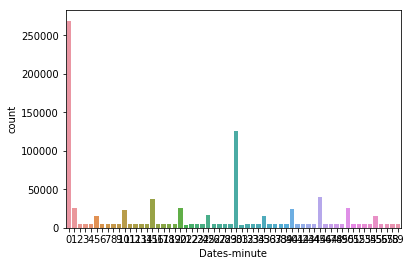

In [28]:
sns.countplot(data = train, x = "Dates-minute")

In [29]:
import numpy as np

train["Dates-minute(abs)"] = np.abs(train["Dates-minute"] - 30)
test["Dates-minute(abs)"] = np.abs(test["Dates-minute"] - 30)

print(train.shape)
train[["Dates-minute", "Dates-minute(abs)"]].head()

(878049, 34)


,Dates-minute,Dates-minute(abs)
0,53,23
1,53,23
2,33,3
3,30,0
4,30,0


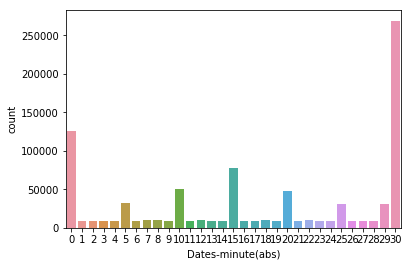

In [30]:
sns.countplot(data = train, x = "Dates-minute(abs)")

### 다른 전처리 방식을 통해 머신러닝 모델의 성능을 개선하기

우리가 앞서 ```Dates```, ```X```, ```Y```, 그리고 ```DayOfWeek```, ```PdDistrict``` 컬럼을 다룬 방식 외에도, 저번 주 과제에서 탐험적 데이터 분석(EDA)을 한 내용을 바탕으로 머신러닝 모델의 성능을 더 개선할 수 있을 것 같습니다. 가령 예를 들자면 다음과 같습니다.

  * ```X```, ```Y``` 컬럼에는 아웃라이어(outlier)가 있기 때문에, 이를 고쳐주거나 제거해주면 모델의 성능을 개선시킬 수 있으리라 생각합니다.
  * ```Dates``` 컬럼은 기록이 완벽하게 되어있지 않은 것 같습니다. (가령 분(```Dates-minute```의 경우 0분, 30분, 15분, 45분 순으로 범죄 발생 횟수가 많았습니다) 이 경우 완벽하지 않은 기록들을 고쳐주거나 완벽하지 않다는 사실을 별도로 알려주면 머신러닝 모델이 이 데이터를 조금 더 쉽게 이해하고, 완벽하게 기록되어있지 않은 데이터를 잘못 예측해서 오해를 일으키는 상황을 방지할 수 있을 것입니다.
  * 요일(```DayOfWeek```) 컬럼을 그냥 사용하는 것도 방법이지만, 월~일이 아닌 주중/주말만으로 나눠서 사용하는 것도 방법 중에 하나입니다. 주중/주말은 금토로 나눌 수도 있지만, 토일로 나눌 수도 있습니다.

이러한 내용을 바탕으로, 앞서 전처리한것과 다른 방식으로 전처리를 하여 모델을 개선해주세요.

모델이 개선되었는지 판가름하는 여부는 아래 **Evaluate** 세션에서 나온 점수와 캐글([Kaggle](https://kaggle.com/c/sf-crime)) 점수를 통해 판가름할 수 있습니다. 가령 Multi-class logarithmic loss (이하 [Log Loss]((https://www.kaggle.com/c/sf-crime#evaluation)))를 기준으로 1) **Evaluate** 세션에서 이전 점수보다 수정한 모델의 점수가 낮아지고, 동시에 2) 캐글 점수도 마찬가지로 낮아진다면 모델이 더 개선되었다고 판단할 수 있습니다.



In [31]:
# Write your code here!

### Train
전처리(preprocessing)가 끝났으면, 이제 이 데이터를 활용해 머신러닝 알고리즘을 학습(train)시켜 보겠습니다.

이전까지의 캐글(Kaggle) 경진대회와 마찬가지로, 이번에도 머신러닝(Machine Learning) 알고리즘을 사용하려고 합니다. 이번에도 변함없이 지도학습(Supervised Learning) 알고리즘을 사용할 생각이기 때문에, 데이터를 Label(맞춰야 하는 정답)과 Feature(Label을 맞추는데 도움이 되는 값들)로 나눌 필요가 있습니다.

이번 경진대회에서는 다음의 컬럼들을 Feature와 Label로 활용할 것입니다.

  * **Feature**: 날짜와 시간(```Dates```), 위도와 경도(```X```, ```Y```), 요일(```DayOfWeek```), 관할 경찰서(```PdDistrict```) + a 등등...
  * **Label**: 범죄의 세부 종류(Category)를 사용합니다.

이를 통해 train 데이터와 test 데이터를 다음의 세 가지 형태의 값으로 나눌 것입니다.

  * **X_train**: train 데이터의 feature 입니다. 줄여서 X_train이라고 부릅니다.
  * **X_test**: test 데이터의 feature 입니다. 마찬가지로 줄여서 X_test라고 부릅니다.
  * **y_train**: train 데이터의 label 입니다. 마찬가지로 줄여서 y_train이라고 부릅니다.

In [32]:
# 먼저 가장 일반적으로 쓸 수 있는 Feature인 경도(X)와 위도(Y)를 Feature로 사용하겠습니다.
feature_names = ["X", "Y", "Crossroad"]

# 하지만 위에서 숫자로 바꾼 날짜/시간 데이터(Dates)
feature_names = feature_names + ["Dates-year", "Dates-month", "Dates-day", "Dates-hour", "Dates-minute(abs)", "Dates-second"]

# 그리고 앞서 One Hot Encoding한 요일(DayOfWeek), 관할 경찰서(PdDistrict) 컬럼명을 이 곳에 넣어주면
# 머신러닝 모델의 성능이 더 올라갈 것입니다.
feature_names = feature_names + list(train_dayofweek.columns)
feature_names = feature_names + list(train_pddistrict.columns)

# 마찬가지로 요일(DayOfWeek), 관할 경찰서(PdDistrict) 컬럼 외에도
# 탐험적 데이터 분석(EDA)를 통해 분석한 결과가 반영된 새로운 컬럼들을 이 곳에 넣어주면 성능이 올라갈 것입니다.

feature_names

['X',
 'Y',
 'Crossroad',
 'Dates-year',
 'Dates-month',
 'Dates-day',
 'Dates-hour',
 'Dates-minute(abs)',
 'Dates-second',
 'DayOfWeek_Friday',
 'DayOfWeek_Monday',
 'DayOfWeek_Saturday',
 'DayOfWeek_Sunday',
 'DayOfWeek_Thursday',
 'DayOfWeek_Tuesday',
 'DayOfWeek_Wednesday',
 'PdDistrict_BAYVIEW',
 'PdDistrict_CENTRAL',
 'PdDistrict_INGLESIDE',
 'PdDistrict_MISSION',
 'PdDistrict_NORTHERN',
 'PdDistrict_PARK',
 'PdDistrict_RICHMOND',
 'PdDistrict_SOUTHERN',
 'PdDistrict_TARAVAL',
 'PdDistrict_TENDERLOIN']

In [33]:
# 범죄의 세부 종류(Category)를 label_name으로 사용할려고 합니다.
# Category라는 이름의 컬럼을 label_name 이라는 이름의 변수에 할당합니다.
label_name = "Category"
label_name

'Category'

In [34]:
# feature_names를 활용해 train 데이터의 feature를 가져옵니다.
# 이를 X_train이라는 이름의 변수에 할당합니다.
X_train = train[feature_names]

# X_train 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(X_train.shape)

# X_train 데이터의 상위 5개를 띄웁니다.
X_train.head()

(878049, 26)


,X,Y,Crossroad,Dates-year,Dates-month,Dates-day,Dates-hour,Dates-minute(abs),Dates-second,DayOfWeek_Friday,...,PdDistrict_BAYVIEW,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN
0,-122.425892,37.774599,True,2015,5,13,23,23,0,0,...,0,0,0,0,1,0,0,0,0,0
1,-122.425892,37.774599,True,2015,5,13,23,23,0,0,...,0,0,0,0,1,0,0,0,0,0
2,-122.424363,37.800414,True,2015,5,13,23,3,0,0,...,0,0,0,0,1,0,0,0,0,0
3,-122.426995,37.800873,False,2015,5,13,23,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,-122.438738,37.771541,False,2015,5,13,23,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [35]:
# feature_names를 활용해 test 데이터의 feature를 가져옵니다.
# 이를 X_test라는 이름의 변수에 할당합니다.
X_test = test[feature_names]

# X_test 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(X_test.shape)

# X_test 데이터의 상위 5개를 띄웁니다.
X_test.head()

(884262, 26)


,X,Y,Crossroad,Dates-year,Dates-month,Dates-day,Dates-hour,Dates-minute(abs),Dates-second,DayOfWeek_Friday,...,PdDistrict_BAYVIEW,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN
Id,,,,,,,,,,,,,,,,,,,,,
0,-122.399588,37.735051,False,2015,5,10,23,29,0,0,...,1,0,0,0,0,0,0,0,0,0
1,-122.391523,37.732432,True,2015,5,10,23,21,0,0,...,1,0,0,0,0,0,0,0,0,0
2,-122.426002,37.792212,False,2015,5,10,23,20,0,0,...,0,0,0,0,1,0,0,0,0,0
3,-122.437394,37.721412,False,2015,5,10,23,15,0,0,...,0,0,1,0,0,0,0,0,0,0
4,-122.437394,37.721412,False,2015,5,10,23,15,0,0,...,0,0,1,0,0,0,0,0,0,0


In [36]:
# label_name을 활용해 train 데이터의 label을 가져옵니다.
# 이를 y_train이라는 이름의 변수에 할당합니다.
y_train = train[label_name]

# y_train 변수에 할당된 데이터의 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시되나, column이 없기 때문에 (row,) 형태로 표시될 것입니다.
print(y_train.shape)

# y_train 데이터의 상위 5개를 띄웁니다.
y_train.head()

(878049,)


0          WARRANTS
1    OTHER OFFENSES
2    OTHER OFFENSES
3     LARCENY/THEFT
4     LARCENY/THEFT
Name: Category, dtype: object

### Use Random Forest
X_train, X_test, y_train 데이터를 만들었으면, 이제 이 데이터를 활용하여 머신러닝 알고리즘을 학습시켜 보겠습니다.

이번에 사용할 알고리즘은 랜덤 포레스트([Random Forest](https://en.wikipedia.org/wiki/Random_forest))입니다. 랜덤포레스트 알고리즘의 개략적인 동작 원리는 다음과 같습니다.

 1. 먼저 전체 데이터를 그대로 쓰는게 아니라, 중복을 허용한다는 가정 하에 동일한 개수로 다시 한 번 샘플링(=[복원 추출](https://zetawiki.com/wiki/%EB%B3%B5%EC%9B%90%EC%B6%94%EC%B6%9C,_%EB%B9%84%EB%B3%B5%EC%9B%90%EC%B6%94%EC%B6%9C))을 합니다. 이를 베깅(bagging), 내지는 부트스트랩 어그리게이팅(bootstrap aggregating)이라고 합니다.
 1. 이렇게 샘플링한 데이터마다 머신러닝 알고리즘 중 하나인 의사결정나무([DecisionTree](https://en.wikipedia.org/wiki/Decision_tree))를 학습시킵니다
 1. 1번의 방식을 사용하면 이론적으로 무제한의 의사결정나무를 만들 수 있습니다. 이 의사결정나무를 지정한 갯수(=```n_estimators```)만큼 생성합니다.
 1. 생성한 트리끼리 투표를 합니다. 가령 샌프란시스코 범죄 데이터를 기준으로, 1,000개의 트리 중 700개가 절도라고 판단하고 / 300개가 뺑소니라고 판단하면 해당 범죄는 절도라고 판단합니다. 정 반대로 400개가 절도라고 판단하고 / 600개가 뺑소니라고 판단하면 해당 범죄는 뻉소니라고 판단합니다.
 
이러한 방식을 거치면 의사결정나무(Decision Tree)를 포함한 다른 알고리즘보다 더 강력한 알고리즘을 구현할 수 있습니다. (자세한 설명은 [다음의 링크](http://swalloow.tistory.com/92)를 참고 바랍니다)

이번에도 파이썬의 머신러닝 패키지인 [scikit-learn](https://scikit-learn.org/)에서 랜덤 포레스트를 가져오겠습니다. scikit-learn에 있는 머신러닝 알고리즘에는 크게 두 가지 기능이 있습니다.

  * **fit**: 머신러닝 알고리즘을 학습시킵니다. 전문용어로 fitting한다고 하기 때문에 fit이라는 표현을 사용합니다. fit을 하기 위해서는 train 데이터가 필요하며, 정확히는 train 데이터의 feature(X_train)와 label(y_train)이 필요합니다.
  * **predict**: fit이 끝나면, 이후에 predict를 통해 예측을 할 수 있습니다. predict를 하기 위해서는 test 데이터가 필요하며, 정확히는 test 데이터의 feature(X_test)가 필요합니다.

In [37]:
# scikit-learn 패키지의 ensemble 모듈에 있는 RandomForestClassifier를 가지고 옵니다.
from sklearn.ensemble import RandomForestClassifier

# RandomForestClassifier를 생성합니다. 실행할 때는 다음의 옵션이 들어갑니다.
# 1) n_estimators. 트리의 개수입니다. 10을 대입하면 트리를 열 개 만들고, 100을 대입하면 트리를 백 개 만듭니다.
# 2) n_jobs. 병렬처리 여부입니다. -1을 대입하면 컴퓨터에 존재하는 모든 코어(Core, ex: 듀얼코어, 쿼드코어)를 전부 활용합니다.
# 3) random_state. 랜덤포레스트의 결과가 랜덤하게 나오는 것을 고정하는 옵션입니다. 아무 숫자나 넣어주면 됩니다. (공학 용어에서 쓰이는 Seed Number와 동일한 개념입니다)
model = RandomForestClassifier(n_estimators = 10,
                              n_jobs = -1,
                              random_state = 37)
model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=37, verbose=0, warm_start=False)

### Use Gradient Boosting Machine(LightGBM)

그리고 이번 경진대회에서는, 랜덤포레스트(Random Forest)에 이은 또 다른 머신러닝 모델을 이용해보겠습니다.

이번에 사용할 알고리즘은 그래디언트 부스팅 머신(Gradient Boosting Machine)입니다. 그래디언트 부스팅 머신은 의사결정나무(Decision Tree)에 그래디언트 부스팅(Boosting Machine)이라는 알고리즘을 적용한 모델인데, 정형화 데이터(Structured Data)에 한해서는 가장 강력한 머신러닝 알고리즘이라고 불리우고 있습니다. 알고리즘의 동작 원리는 다음과 같습니다.

  1. 의사결정나무(Decision Tree)를 하나 학습합니다.
  1. 1번에서 학습한 의사결정나무를 통해, 학습(train)데이터를 예측합니다. 그리고 예측값과 정답의 차이(residual)를 계산합니다.
  1. 위 차이(residual)를 보정하는 또 하나의 의사결정나무(Decision Tree)를 학습합니다. 두 번째 의사결정나무에서는 차이를 입력값으로 받고, 차이를 보정하기 위해서는 얼만큼의 보정값이 필요한지를 예측합니다.
위 방식을 끊임없이 반복합니다.

이러한 방식을 거치면 의사결정나무(Decision Tree)보다 더 강력한 알고리즘을 구현할 수 있습니다. 자세한 설명은 다음의 링크들을 참고해주세요.

  * [A Kaggle Master Explains Gradient Boosting](http://blog.kaggle.com/2017/01/23/a-kaggle-master-explains-gradient-boosting/)
  * [Gradient Boosting from scratch](https://medium.com/mlreview/gradient-boosting-from-scratch-1e317ae4587d)
  * [A Gentle Introduction to the Gradient Boosting Algorithm for Machine Learning](https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/)
  
이번에는 가장 강력한 그래디언트 부스팅 머신(Gradient Boosting Machine) 구현체중 하나인 [LightGBM](https://lightgbm.readthedocs.io/en/latest/)을 사용하겠습니다. LightGBM의 분류(Classification)용 머신러닝 모델인 LGBMClassifier를 가져올텐데, 이 LGBMClassifier에는 크게 두 가지 기능이 있습니다.

  * **fit**: 머신러닝 알고리즘을 학습시킵니다. 전문용어로 fitting한다고 하기 때문에 fit이라는 표현을 사용합니다. fit을 하기 위해서는 train 데이터가 필요하며, 정확히는 train 데이터의 feature(X_train)와 label(y_train)이 필요합니다.
  * **predict**: fit이 끝나면, 이후에 predict를 통해 예측을 할 수 있습니다. predict를 하기 위해서는 test 데이터가 필요하며, 정확히는 test 데이터의 feature(X_test)가 필요합니다.

먼저 이 LightGBM이라는 파이썬 패키지를 설치해보겠습니다.

(주의: LightGBM는 다른 패키지에 비해 설치 난이도가 높습니다. 때문에 초반에 설치가 원활하게 되지 않을 가능성이 있지만, 설치가 되지 않더라도 당황하지 않고 메뉴얼을 살펴보면서 천천히 설치해보세요. 만일 설치가 되지 않을 경우, [다음의 링크](http://bit.ly/lightgbm-install)를 살펴보시면 도움이 될 겁니다)

In [38]:
# 파이썬을 아나콘다로 설치하신 분들은, 아래의 코드를 실행하면 LightGBM을 설치할 수 있습니다.
!conda install -c conda-forge -y lightgbm

In [39]:
# 파이썬을 아나콘다로 설치하지 않은 분들은(그리고 pip가 설치되어 있는 분들은),
# 아래의 코드를 실행하면 LightGBM을 설치할 수 있습니다.
!pip install lightgbm

만일 pip로 설치가 안 되는 분들은, 터미널이나 명령 프롬프트에서 다음의 코드를 실행시키면 lightgbm이 설치될 것입니다. 자세한 설명은 [다음의 링크](https://github.com/Microsoft/LightGBM/issues/1456#issuecomment-397829471)를 참고 바랍니다.

```
pip uninstall lightgbm

brew reinstall open-mpi 
brew reinstall cmake
brew reinstall gcc (resulting in version 8.1.0)

git clone --recursive https://github.com/Microsoft/LightGBM ; cd LightGBM
export CXX=g++-8 CC=gcc-8
mkdir build ; cd build
cmake ..
make -j4

cd LightGBM/python-package
python setup.py install --precompile
```

In [40]:
from lightgbm import LGBMClassifier

model = LGBMClassifier(n_estimators = 10,
                       random_state = 37)
model

/Users/shayne.kang/.pyenv/versions/3.6.7/envs/dsschool/lib/python3.6/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.1) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=10, n_jobs=-1, num_leaves=31, objective=None,
        random_state=37, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

### Evaluate

머신러닝 모델을 가져왔으면, 이를 활용하여 모델의 성능을 측정하겠습니다.

머신러닝 모델의 점수를 측정하는 방식은 크게 두 가지, 1) Hold Out Validation 과 2) Cross Validation입니다. 두 방식 모두 장단점이 있지만, 이번 경진대회에서는 Hold Out Validation을 사용하겠습니다. (Hold Out Validation과 Cross Validation의 차이는 [다음의 링크](https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6)를 참고 바랍니다.)

먼저 ```train_test_split``` 함수를 통해 train 데이터를 두 개로 쪼갠 뒤, 하나는 모델을 학습시키는 용도로 사용하고(```X_train_kf```, ```y_train_kf```), 다른 하나는 모델을 검증하는 용도로 사용하겠습니다. (```X_test_kf```, ```y_test_kf```)

In [41]:
# scikit-learn의 model_selection 모듈에서 train_test_split 함수를 가져옵니다.
# 이 함수는 데이터를 일정 비율로 두 개로 쪼개는 역할을 담당합니다.
from sklearn.model_selection import train_test_split

# train 데이터를 두 개로 쪼갭니다. 쪼개는 비율은 7:3으로 할 것이며
# 7의 부분이 X_train_kf와 y_train_kf로 들어가고, 3의 부분이 X_test_kf와 y_test_kf로 들어갑니다.
# 실행할때마다 매 번 동일한 결과가 나오도록 하기 위해 random_state 옵션을 줘서 seed를 고정시킵니다.
X_train_kf, X_test_kf, y_train_kf, y_test_kf = \
    train_test_split(X_train, y_train, test_size = 0.3, random_state = 37)

# X_train_kf와 y_train_kf 변수에 할당된 데이터의 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(X_train_kf.shape, y_train_kf.shape)

# X_test_kf와 y_test_kf 변수에 할당된 데이터의 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(X_test_kf.shape, y_test_kf.shape)

(614634, 26) (614634,)
(263415, 26) (263415,)


In [42]:
# 머신러닝 모델을 학습(fitting)합니다.
# 학습에는 fit 이라는 기능을 사용하며, train 데이터의 feature(X_train)와 label(y_train)을 집어넣습니다.
# 추가로 %time 옵션을 왼쪽에 넣으면 실행 시간을 측정할 수 있습니다.
%time model.fit(X_train_kf, y_train_kf)

CPU times: user 51.7 s, sys: 3.59 s, total: 55.3 s
Wall time: 28.9 s


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=10, n_jobs=-1, num_leaves=31, objective=None,
        random_state=37, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [43]:
# fit이 끝났으면, predict_proba를 통해 각 범죄가 발생할 확률(probability)를 구합니다.
# predict가 아닌 predict_proba를 사용하는 이유는, 아래서 사용할 log loss 공식에서 확률을 이용하기 때문입니다.
# 이 결과를 y_predict_test_kf라는 이름의 변수에 할당합니다.
y_predict_test_kf = model.predict_proba(X_test_kf)

# y_predict_test_kf 변수에 할당된 데이터의 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(y_predict_test_kf.shape)

# y_predict_test_kf를 화면에 출력합니다.
y_predict_test_kf

(263415, 39)


array([[0.00171242, 0.10286227, 0.00041423, ..., 0.04170681, 0.05666665,
        0.01134625],
       [0.00158126, 0.07926763, 0.00055348, ..., 0.07118374, 0.03361413,
        0.00722577],
       [0.00149047, 0.07970004, 0.00036972, ..., 0.04293366, 0.05126478,
        0.01033183],
       ...,
       [0.00166128, 0.06320541, 0.00037415, ..., 0.1881671 , 0.03077297,
        0.00722738],
       [0.00276766, 0.09404594, 0.00057549, ..., 0.05439752, 0.04221449,
        0.0113786 ],
       [0.00152458, 0.09135366, 0.00044105, ..., 0.06180578, 0.05920075,
        0.0100119 ]])

예측이 끝났으면, 측정 공식(Evaluation Metrics)을 활용해 모델이 개선되었는지를 정량적으로 파악해보겠습니다.

이번 San Francisco Crime Classification 경진대회에서 사용하는 측정 공식은 Multi-class logarithmic loss, 줄여서 [log loss](https://www.kaggle.com/c/sf-crime#evaluation)라고 합니다. 이 공식은 여러 종류(class)의 label을 예측하는 multi-class classification에서 주로 사용하는 측정 공식 중 하나이며, 공식은 다음과 같습니다.

$$
log loss = -\frac{1}{N}\sum_{i=1}^N\sum_{j=1}^My_{ij}\log(p_{ij})
$$

여기서 $N$은 데이터의 개수(train 데이터는 878049개, test 데이터는 884262개), $M$은 범죄의 종류(절도, 살인, 뺑소니 등등), $log$는 자연 로그($log_e$), $y$가 정답(0 또는 1)을 나타내며, $p$가 예측값의 확률(0~1사이)을 나타냅니다.

log loss의 간단한 의미는 다음과 같습니다. 1) 어떤 한 범죄가($y_{ij}$) 있을 때, 2) 예측 모델이 그 범죄일 확률이 높다고 예측했을 경우($p_{ij}$) 값이 낮아지고, 그렇지 않을 경우 값이 높아집니다. 가령 첫 번째 행(row)의 범죄가 폭행(ARSON)이라고 가정했을 때($y_{0, arson} = 1$), 예측 모델이 이를 폭행이라고 예측했을 경우($p_{0, arson} = 1.0$) log loss의 값은 낮아지고, 정 반대로 폭행이 아니라고 예측했을 경우($p_{0, arson} = 0.0$) log loss의 값을 높아집니다.

즉, 이 측정 공식은 **낮을 수록 좋으며, 높을 수록 좋지 않습니다.** 이 숫자를 낮게 만드는 쪽으로 모델을 개선하는게 핵심입니다.

log loss에 대한 더 자세한 사항은 [다음의 링크](http://wiki.fast.ai/index.php/Log_Loss)를 참고 바랍니다.




In [44]:
# scikit-learn의 측정 공식(metrics) 모듈에서 log_loss 함수를 가져옵니다.
from sklearn.metrics import log_loss

# log loss를 계산합니다. 정답(y, y_test_kf)과 예측값의 확률(p, y_predict_test_kf)을 데이터로 집어넣으면
# log lsos의 계산 결과가 나옵니다. 이를 score라는 변수에 할당합니다.
score = log_loss(y_test_kf, y_predict_test_kf)

# score 변수에 할당한 점수를 출력합니다.
print(f"Score = {score:.5f}")

Score = 2.51620


### Predict

Hold Out Validation(+log loss)을 통해 만족스러운 점수가 나왔다면, 이제 머신러닝 모델을 학습할 시간입니다.

앞서 설명한대로 머신러닝 모델의 fit 함수로 학습을 시킵니다. 학습을 할 때는 1) train 데이터의 feature인 X_train, 그리고 2) train 데이터의 label인 y_train이 필요합니다.

In [49]:
# 머신러닝 모델을 학습(fitting)합니다.
# 학습에는 fit 이라는 기능을 사용하며, train 데이터의 feature(X_train)와 label(y_train)을 집어넣습니다.
# 추가로 %time 옵션을 왼쪽에 넣으면 실행 시간을 측정할 수 있습니다.
%time model.fit(X_train, y_train)

CPU times: user 1min 8s, sys: 3.41 s, total: 1min 12s
Wall time: 27.3 s


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=10, n_jobs=-1, num_leaves=31, objective=None,
        random_state=37, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [50]:
# fit이 끝났으면, predict_proba를 통해 각 범죄가 발생할 확률(probability)를 구합니다.
# 이 결과를 prediction_list라는 이름의 변수에 할당합니다.
prediction_list = model.predict_proba(X_test)

# prediction_list라는 변수에 할당된 데이터의 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(prediction_list.shape)

# prediction_list를 화면에 출력합니다.
prediction_list

(884262, 39)


array([[0.00216117, 0.10380535, 0.00034614, ..., 0.04587594, 0.06248739,
        0.01868372],
       [0.00173615, 0.07278891, 0.00029458, ..., 0.03921605, 0.06619139,
        0.0186126 ],
       [0.0016467 , 0.10518839, 0.00034141, ..., 0.04083428, 0.04675181,
        0.00926007],
       ...,
       [0.00152292, 0.08024502, 0.00065518, ..., 0.08301055, 0.03055988,
        0.00937053],
       [0.00164823, 0.08275463, 0.0005346 , ..., 0.08018504, 0.03337531,
        0.00950391],
       [0.00035878, 0.01701914, 0.00015435, ..., 0.01955651, 0.00719962,
        0.00200491]])

### Submit

머신러닝 모델을 활용해서 test 데이터에서 각 범죄가 발생할 확률(probability)을 예측했습니다. 이후에는 이를 캐글(kaggle)이 권장하는 제출(submission) 포멧에 맞게 정리한 뒤 파일로 저장하는 것만 남았습니다.

이번 San Francisco Crime Classification 경진대회에서는 sampleSubmission.csv라는 제출 포멧을 제공합니다. ([다운로드 링크](https://www.kaggle.com/c/sf-crime/data)) 이 제출 포멧에 예측한 값을 채워넣고 저장할 것입니다.

In [51]:
# 캐글이 제공하는 제출 포멧(sampleSubmission.csv)을 읽어옵니다.
# 이를 sample_submission 이라는 이름의 변수에 할당합니다.
sample_submission = pd.read_csv("sampleSubmission.csv", index_col = "Id")

# 예측값(prediction_list), 제출 포멧(sample_submission), 그리고 예측모델의 결과(model)를 활용해
# 제출본(submission)을 만듭니다. prediction_list를 판다스 DataFrame으로 바꾸되,
# 이 데이터프레임의 인덱스(Index)는 제출 포멧(sample_submission)으로,
# 컬럼(columns)은 예측모델(model)이 학습한 클래스를 사용합니다.
submission = pd.DataFrame(prediction_list,
                          index = sample_submission.index,
                          columns = model.classes_)

# submission 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(submission.shape)

# submission 데이터의 상위 5개를 띄웁니다.
submission.head()

(884262, 39)


,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,EMBEZZLEMENT,...,SEX OFFENSES NON FORCIBLE,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
Id,,,,,,,,,,,,,,,,,,,,,
0,0.002161,0.103805,0.000346,0.000484,0.037533,0.004327,0.003498,0.050444,0.005034,0.001196,...,0.000215,0.005491,0.000590,0.044468,0.000004,0.007176,0.057535,0.045876,0.062487,0.018684
1,0.001736,0.072789,0.000295,0.000256,0.022993,0.003578,0.004517,0.074605,0.004301,0.000782,...,0.000148,0.005924,0.000339,0.032059,0.000004,0.005000,0.037261,0.039216,0.066191,0.018613
2,0.001647,0.105188,0.000341,0.000248,0.052939,0.004077,0.003767,0.047125,0.007218,0.001030,...,0.000139,0.007180,0.000531,0.038668,0.000004,0.010829,0.054202,0.040834,0.046752,0.009260
3,0.002112,0.116314,0.000339,0.000383,0.039768,0.004089,0.003859,0.060023,0.004754,0.001033,...,0.000163,0.006523,0.000616,0.040946,0.000004,0.008933,0.054363,0.043347,0.043586,0.013383
4,0.002112,0.116314,0.000339,0.000383,0.039768,0.004089,0.003859,0.060023,0.004754,0.001033,...,0.000163,0.006523,0.000616,0.040946,0.000004,0.008933,0.054363,0.043347,0.043586,0.013383


In [52]:
# 마지막으로 submission 변수에 들어간 값을 csv 형식의 데이터로 저장합니다.
submission.to_csv("sf-crime-2.51567.csv")

이제 캐글의 제출 페이지([Late Submission](https://www.kaggle.com/c/sf-crime/submit))로 이동해 sf-crime-2.51567.csv 파일을 제출하면 점수를 확인할 수 있습니다.

(주의: 용량이 매우 크기 때문에, 그대로 캐글에 제출하지 말고 압축해서 제출하는 걸 추천 드립니다)

## 제출

과제를 다 끝내셨으면 http://bit.ly/ds-assignment 에서 안내에 따라 과제를 제출하여 주세요! 과제를 제출해주시면 검토 결과를 드립니다. 다음 Level에서 과제 내용을 다루기 때문에 솔루션은 따로 제공해드리지 않습니다.

수업이나 과제 관련 질문, 수료증 문의 등은 담당 튜터(조교)에게 문의 주세요. 영수증 발급 등의 문의는 support@dsschool.co.kr 로 메일 주시면 담당자분이 응대해주실 겁니다. 기타 궁금한 사항은 슬랙으로 문의 주세요!

기존의 라이브북 시스템을 이용하고 계신 수강생분들도 곧바로 슬랙으로 초대해드리겠습니다.